## <span style="background:#b4b564"> LIBRERIAS </span> 

In [1]:
import pandas as pd
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.empty.html
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import emoji
#definir eñlnumero de columnas visibles en un dataframe
pd.set_option("display.max_columns",200)
#definir el numero de filas visibles en un dataframe
pd.set_option("display.max_rows",100)

##   <span style="background:#b4b564"> OBJETIVO </span> 

- Aplicar las técnicas de calidad de datos en información de apoyos en el estado de Jalisco de diversos programas donde la unidad muestral de la tabla es beneficiario y programa

##  <span style="background:#fe7f00"> Dataset </span> 

In [2]:
#catalogos
sexo=pd.read_csv("../data/calidad_datos/cat_sexo.csv",encoding="utf-8",)
ocupacion=pd.read_csv("../data/calidad_datos/cat_ocupacion.csv",encoding="utf-8")
escolaridad=pd.read_csv("../data/calidad_datos/cat_escolaridad.csv",encoding="utf-8")
edad=pd.read_csv("../data/calidad_datos/cat_edad.csv",encoding="utf-8")

In [3]:
edad.head(6)

,CVE,DESCRIP
0,1001,Una hora
1,1002,Dos horas
2,1003,Tres horas
3,1004,Cuatro horas
4,1005,Cinco horas
5,1006,Seis horas


In [4]:
ocupacion.head(6)

,CVE,DESCRIP
0,1,"Funcionarios, directores y jefes"
1,2,Profesionistas y técnicos
2,3,Trabajadores auxiliares en actividades adminis...
3,4,"Comerciantes, empleados en ventas y agentes de..."
4,5,Trabajadores en servicios personales y vigilancia
5,6,"Trabajadores en actividades agrícolas, ganader..."


In [5]:
escolaridad.head(6)

,CVE,DESCRIP
0,1,Sin escolaridad
1,2,Preescolar
2,3,Primaria incompleta
3,4,Primaria completa
4,5,Secundaria incompleta
5,6,Secundaria completa


In [6]:
#Tabla con infomación de apoyos en el estado de Jalisco de distintos programas, la unidad muestral de la tabla es beneficiado y programa
df=pd.read_csv("../data/calidad_datos/data_jalisco.csv",encoding="utf-8")

/tmp/ipykernel_34525/3063656338.py:2: DtypeWarning: Columns (2,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("../data/calidad_datos/data_jalisco.csv",encoding="utf-8")


In [7]:
df.head()

,edad,minutos,monto_de_apoyo,horas,ent_regis,mun_regis,ent_resid,mun_resid,ent_ocurr,mun_ocurr,sexo,ocupacion,edo_civil,lugar_ocur,sitio_ocur,nacionalid,grupo,lengua,clave,escolarida,fecha_nac,fecha_ocurr,programa_fondo,nombre_del_proyecto,nombre_del_beneficiario,salario
0,4069,27,NaN,16,1.0,1,1,1,NaN,1,NaN,11,NaN,88,3,1,7,2.0,6343,1,1946-06-30,2015-05-25,Programa Jalisciense de Fomento a la Propieda...,MX - SISTEMA MECATRÓNICO PARA EL CONTROL DE IN...,RICARDO MERCADO CORTÉS\n,2700
1,4093,0,31446.48,6,NaN,1,1,1,NaN,1,1,6,NaN,88,11,1,8,NaN,6344,3,1921-08-25,2015-09-26,Programa Jalisciense de Fomento a la Propieda...,PCT - SISTEMA MECATRÓNICO PARA EL CONTROL DE I...,RICARDO MERCADO CORTÉS\n,0
2,4092,30,65673.63,16,1.0,1,1,1,NaN,1,1,7,NaN,88,11,1,2,NaN,6345,3,1922-06-12,2015-12-14,Programa Jalisciense de Fomento a la Propieda...,MX-EMPAQUE CÓNICO PARA LA CONEXIÓN \nDE MANGUE...,CORPORATIVO BORO S.A. DE C.V.,3000
3,4047,58,"Sistema Tecnológico de Jalisco, A.C.",3,NaN,1,1,1,NaN,1,"Sistema Tecnológico de Jalisco, A.C.",7,NaN,88,9,1,13,1.0,6346,6,1967-08-28,2015-01-03,Programa Jalisciense de Fomento a la Propieda...,MX-PASTA BIODEGRADABLE PARA USOS MÚLTIPLES\n,CORPORATIVO BORO S.A. DE C.V.\n,5800
4,4040,50,30254.04,6,1.0,1,1,1,NaN,1,2,11,NaN,88,1,1,7,NaN,6364,4,1974-12-17,2015-07-16,Programa Jalisciense de Fomento a la Propieda...,DISPOSITIVO PERSONAL DE COMUNICACIÓN REMOTA PA...,GERALDINA VEGA GAMBOA\n,5000


In [8]:
#Esto devuelve una Serie con el tipo de datos de cada columna. 
df.dtypes

edad                         int64
minutos                      int64
monto_de_apoyo              object
horas                        int64
ent_regis                  float64
mun_regis                    int64
ent_resid                    int64
mun_resid                    int64
ent_ocurr                  float64
mun_ocurr                    int64
sexo                        object
ocupacion                    int64
edo_civil                  float64
lugar_ocur                   int64
sitio_ocur                   int64
nacionalid                   int64
grupo                        int64
lengua                     float64
clave                        int64
escolarida                   int64
fecha_nac                   object
fecha_ocurr                 object
programa_fondo              object
nombre_del_proyecto         object
nombre_del_beneficiario     object
salario                      int64
dtype: object

- float--float64
- int--int64
- datetime--datetime64[ns]
- string--object

In [9]:
#Número de registros
df.shape

(655341, 26)

## <span style="background:#fe7f00"> Etiquetado de variables </span> 

In [10]:
#Este método imprime información sobre un DataFrame, incluido el tipo de índice y las columnas, 
#los valores no nulos y el uso de la memoria.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655341 entries, 0 to 655340
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   edad                     655341 non-null  int64  
 1   minutos                  655341 non-null  int64  
 2   monto_de_apoyo           655339 non-null  object 
 3   horas                    655341 non-null  int64  
 4   ent_regis                458945 non-null  float64
 5   mun_regis                655341 non-null  int64  
 6   ent_resid                655341 non-null  int64  
 7   mun_resid                655341 non-null  int64  
 8   ent_ocurr                0 non-null       float64
 9   mun_ocurr                655341 non-null  int64  
 10  sexo                     655339 non-null  object 
 11  ocupacion                655341 non-null  int64  
 12  edo_civil                0 non-null       float64
 13  lugar_ocur               655341 non-null  int64  
 14  siti

**Contamos con:**
- 4 columnas de tipo float64
- 15 columnas de tipo int64
- 7 columnas de tipo object

In [11]:
#Conocer el tipo de dato es un buen indicador para conocer el tipo de variables y posteriormente etiquetarlas
#Asi como nos puede dar indicios si una variable tiene valores fuera de la naturaleza de la variable
df.select_dtypes(include=['int64',"float64"]).sample(10)

,edad,minutos,horas,ent_regis,mun_regis,ent_resid,mun_resid,ent_ocurr,mun_ocurr,ocupacion,edo_civil,lugar_ocur,sitio_ocur,nacionalid,grupo,lengua,clave,escolarida,salario
171885,4046,50,11,10.0,5,10,5,NaN,5,7,NaN,88,11,1,8,NaN,6492,4,5000
608714,4069,0,19,30.0,73,30,73,NaN,73,11,NaN,88,11,1,8,2.0,6574,1,0
6878,4033,35,20,2.0,2,2,2,NaN,2,98,NaN,9,3,1,19,NaN,6499,6,3500
392318,4075,15,1,NaN,7,17,7,NaN,11,7,NaN,88,5,1,6,NaN,6564,4,1500
177588,4075,49,7,NaN,5,10,32,NaN,32,99,NaN,88,99,1,13,NaN,6443,99,4900
26430,4057,0,22,4.0,3,4,3,NaN,3,11,NaN,88,1,1,4,NaN,6354,4,0
308542,4051,0,16,15.0,33,15,33,NaN,33,11,NaN,88,11,1,10,NaN,6382,6,0
366795,4064,45,21,NaN,52,16,52,NaN,52,11,NaN,88,3,1,2,NaN,6564,3,4500
318152,4071,0,13,NaN,57,15,13,NaN,57,11,NaN,88,9,1,2,NaN,6493,3,0
252054,4017,6,20,NaN,98,14,98,NaN,98,98,NaN,0,11,1,26,NaN,6870,99,600


In [12]:
df.select_dtypes(exclude=['int64',"float64"]).sample(10)
#monto_apoyo se identifica como variable de texto - indicador de que existen datos que no corresponden a un flotante

,monto_de_apoyo,sexo,fecha_nac,fecha_ocurr,programa_fondo,nombre_del_proyecto,nombre_del_beneficiario
505586,380000.0,1,1939-10-07,2015-09-08,Programa Estatal para el Desarrollo de la Indu...,Desarrollo de software especializado para la i...,Eslinga Vikingo S.A. de C.V.
87057,120000.0,1,1936-01-03,2015-10-27,Programa de Incorporación de Maestros y Doctor...,Maestra en Ciencias de la Floricultura,Jocelyn Maira Velazquez Hernandez
141487,50336.83,2,1925-08-07,2015-01-16,Programa Jalisciense de Fomento a la Propieda...,"BIO-REACTOR COMBINADO (CBR), CON BIO-REACTORES...",FRANCISCO XAVIER VALDÉS SIMANCAS\n
47379,5251.0,1,1959-06-21,2015-07-25,Programa Jalisciense de Fomento a la Propieda...,SOFTWARE AIRE AMG PARA ANDROID\n,INSTITUTO TECNOLÓGICO Y DE ESTUDIOS SUPERIORES...
579790,50000.0,2,1950-12-12,2015-06-13,Programa de Difusión y Divulgación de la Cien...,Laboratorio de Innovación Ciudadana y Diseño S...,CONSEJO PROMOTOR DE LA INNOVACIÓN Y EL DISEÑO ...
274097,30632.55,2,1989-11-05,2015-01-22,Programa Jalisciense de Fomento a la Propieda...,TARIMA PARA CARGA CON SOPORTE BASTIDOR Y CUBIE...,GERARDO TORNEL LEAÑOS\n
641406,12254.04,1,1940-06-09,2015-10-13,Programa Jalisciense de Fomento a la Propieda...,MODELO INDUSTRIAL DE MUEBLE\n,BRIAN ALEJANDRO FRANCO CEJA\n
59363,380000.0,1,1950-04-15,2015-03-07,Programa Estatal para el Desarrollo de la Indu...,Desarrollo de software especializado para la i...,Eslinga Vikingo S.A. de C.V.
54789,534650.0,2,1997-08-21,2015-08-22,Programa para el Fomento de Recursos Humanos ...,Becas Singularity U México Summit 4.0 INDUSTRI...,4.0 INDUSTRIAL CLUSTER AC
104432,5251.0,1,1939-04-10,2015-11-21,Programa Jalisciense de Fomento a la Propieda...,AIRE AMG PARA IOS,INSTITUTO TECNOLÓGICO Y \nDE ESTUDIOS SUPERIOR...


In [13]:
#Prefijos para los tipos de variables
#La siguiente nomenclatura se trabajara en el módulo
# "c_"  - Variables numericas : Discretas y continuas
# "v_"  - Variables categoricas
# "d_"  - Variables tipo fecha
# "t_"  - Variables de texto : comentarios, descripciones, url
# "g_"  - Variables geograficas


c_feats=["edad","monto_de_apoyo","horas","minutos","salario","n_hijos"]
v_feats=["ent_regis","mun_regis","ent_resid","mun_resid","ent_ocurr","mun_ocurr","sexo","ocupacion","edo_civil",
        "lugar_ocur","sitio_ocur","nacionalid","grupo","lengua","clave","escolarida"]
d_feats=["fecha_nac","fecha_ocurr"]
t_feats=["programa_fondo","nombre_del_beneficiario","nombre_del_proyecto"]

In [14]:
c_feats_new=["c_"+x for x in c_feats]
v_feats_new=["v_"+x for x in v_feats]
d_feats_new=["d_"+x for x in d_feats]
t_feats_new=["t_"+x for x in t_feats]

In [15]:
c_feats

['edad', 'monto_de_apoyo', 'horas', 'minutos', 'salario', 'n_hijos']

In [16]:
c_feats_new

['c_edad',
 'c_monto_de_apoyo',
 'c_horas',
 'c_minutos',
 'c_salario',
 'c_n_hijos']

In [17]:
df.rename(columns=dict(zip(d_feats,d_feats_new)),inplace=True)
df.rename(columns=dict(zip(v_feats,v_feats_new)),inplace=True)
df.rename(columns=dict(zip(t_feats,t_feats_new)),inplace=True)
df.rename(columns=dict(zip(c_feats,c_feats_new)),inplace=True)

In [18]:
df.filter(like="d_")

,d_fecha_nac,d_fecha_ocurr
0,1946-06-30,2015-05-25
1,1921-08-25,2015-09-26
2,1922-06-12,2015-12-14
3,1967-08-28,2015-01-03
4,1974-12-17,2015-07-16
...,...,...
655336,1996-03-20,2015-03-01
655337,1955-07-09,2015-02-25
655338,1990-02-18,2015-06-06
655339,1934-02-18,2015-08-13


## <span style="background:#fe7f00"> Duplicados </span> 

###  <span style="background:#759566"> Duplicados general </span> 

In [19]:
n_rows=df.shape[0]

In [20]:
df.head()

,c_edad,c_minutos,c_monto_de_apoyo,c_horas,v_ent_regis,v_mun_regis,v_ent_resid,v_mun_resid,v_ent_ocurr,v_mun_ocurr,v_sexo,v_ocupacion,v_edo_civil,v_lugar_ocur,v_sitio_ocur,v_nacionalid,v_grupo,v_lengua,v_clave,v_escolarida,d_fecha_nac,d_fecha_ocurr,t_programa_fondo,t_nombre_del_proyecto,t_nombre_del_beneficiario,c_salario
0,4069,27,NaN,16,1.0,1,1,1,NaN,1,NaN,11,NaN,88,3,1,7,2.0,6343,1,1946-06-30,2015-05-25,Programa Jalisciense de Fomento a la Propieda...,MX - SISTEMA MECATRÓNICO PARA EL CONTROL DE IN...,RICARDO MERCADO CORTÉS\n,2700
1,4093,0,31446.48,6,NaN,1,1,1,NaN,1,1,6,NaN,88,11,1,8,NaN,6344,3,1921-08-25,2015-09-26,Programa Jalisciense de Fomento a la Propieda...,PCT - SISTEMA MECATRÓNICO PARA EL CONTROL DE I...,RICARDO MERCADO CORTÉS\n,0
2,4092,30,65673.63,16,1.0,1,1,1,NaN,1,1,7,NaN,88,11,1,2,NaN,6345,3,1922-06-12,2015-12-14,Programa Jalisciense de Fomento a la Propieda...,MX-EMPAQUE CÓNICO PARA LA CONEXIÓN \nDE MANGUE...,CORPORATIVO BORO S.A. DE C.V.,3000
3,4047,58,"Sistema Tecnológico de Jalisco, A.C.",3,NaN,1,1,1,NaN,1,"Sistema Tecnológico de Jalisco, A.C.",7,NaN,88,9,1,13,1.0,6346,6,1967-08-28,2015-01-03,Programa Jalisciense de Fomento a la Propieda...,MX-PASTA BIODEGRADABLE PARA USOS MÚLTIPLES\n,CORPORATIVO BORO S.A. DE C.V.\n,5800
4,4040,50,30254.04,6,1.0,1,1,1,NaN,1,2,11,NaN,88,1,1,7,NaN,6364,4,1974-12-17,2015-07-16,Programa Jalisciense de Fomento a la Propieda...,DISPOSITIVO PERSONAL DE COMUNICACIÓN REMOTA PA...,GERALDINA VEGA GAMBOA\n,5000


In [21]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
655336     True
655337     True
655338     True
655339     True
655340     True
Length: 655341, dtype: bool

In [22]:
df[df.duplicated()]

,c_edad,c_minutos,c_monto_de_apoyo,c_horas,v_ent_regis,v_mun_regis,v_ent_resid,v_mun_resid,v_ent_ocurr,v_mun_ocurr,v_sexo,v_ocupacion,v_edo_civil,v_lugar_ocur,v_sitio_ocur,v_nacionalid,v_grupo,v_lengua,v_clave,v_escolarida,d_fecha_nac,d_fecha_ocurr,t_programa_fondo,t_nombre_del_proyecto,t_nombre_del_beneficiario,c_salario
655333,4093,0,31446.48,6,NaN,1,1,1,NaN,1,1,6,NaN,88,11,1,8,NaN,6344,3,1921-08-25,2015-09-26,Programa Jalisciense de Fomento a la Propieda...,PCT - SISTEMA MECATRÓNICO PARA EL CONTROL DE I...,RICARDO MERCADO CORTÉS\n,0
655334,4004,10,50336.83,16,1.0,7,1,7,NaN,1,2,97,NaN,88,3,1,6,2.0,6472,1,2010-09-14,2015-08-23,Programa Jalisciense de Fomento a la Propieda...,PRENDA ÍNTIMA DE MATERIAL ABSORBENTE CON MEDIO...,SILVIA MARIBEL BARCIA TAPIA\n,1000
655335,4071,55,Molina Pasquel Y Henriquez,9,NaN,1,1,1,NaN,1,Molina Pasquel Y Henriquez,11,NaN,88,3,1,2,9.0,6488,6,1943-08-03,2015-01-28,Programa Jalisciense de Fomento a la Propieda...,MODELO INDUSTRIAL DE MUEBLE\n,BRIAN ALEJANDRO FRANCO CEJA\n,5500
655336,4019,2,30884.1,8,NaN,1,1,1,NaN,1,2,11,NaN,88,3,1,3,NaN,6500,7,1996-03-20,2015-03-01,Programa Jalisciense de Fomento a la Propieda...,PCT DE SISTEMA Y APARATO INALÁMBRICO PARA REGI...,DANIEL ARAGÓN HAN\n,200
655337,4059,55,31209.56,17,2.0,4,2,4,NaN,4,1,11,NaN,88,1,1,4,NaN,6567,99,1955-07-09,2015-02-25,Programa Jalisciense de Fomento a la Propieda...,MANIQUI PARA SEÑALIZACIÓN VIAL DE FORMA VISUAL...,LUIS DAVID ALDAS ROBLES\n,5500
655338,4025,5,62113.6,0,1.0,5,1,5,NaN,1,2,11,NaN,88,1,1,2,2.0,6515,8,1990-02-18,2015-06-06,Programa Jalisciense de Fomento a la Propieda...,PCT DE COMPOSICIÓN VEGETARIANA Y BIODEGRADABLE...,INSTITUTO TECNOLÓGICO Y DE ESTUDIOS SUPERIORES...,500
655339,4080,30,12254.04,11,1.0,11,1,11,NaN,11,1,11,NaN,88,11,1,5,NaN,6487,3,1934-02-18,2015-08-13,Programa Jalisciense de Fomento a la Propieda...,MODELO INDUSTRIAL DE MUEBLE\n,BRIAN ALEJANDRO FRANCO CEJA\n,3000
655340,4087,15,12254.04,10,NaN,5,1,1,NaN,1,2,11,NaN,88,9,1,6,NaN,6517,3,1928-03-18,2015-10-04,Programa Jalisciense de Fomento a la Propieda...,MODELO INDUSTRIAL DE MUEBLE\n,BRIAN ALEJANDRO FRANCO CEJA\n,1500


In [23]:
df.shape

(655341, 26)

In [24]:
df.duplicated().sum()#Total de registros duplicados

8

In [25]:
df.drop_duplicates(inplace=True)#Eliminamos duplicados de la tabla

In [26]:
df.duplicated().sum()#Verificamos

0

In [27]:
df.reset_index(drop=True,inplace=True)#Creamos un nuevo indice y eliminamos el anterior

In [28]:
n_duplicados=n_rows-df.shape[0]

In [29]:
print(f"Número de duplicados general : { n_duplicados}")

Número de duplicados general : 8


###  <span style="background:#759566"> Duplicados por ID </span> 

In [30]:
#Verificamos que no existan duplicados por las siguientes variables:
#"t_nombre_del_beneficiario"
#"t_nombre_del_proyecto"
#"t_programa_fondo" 
#"d_fecha_ocurr"

#Es importante conocer la unidad muestral para verificar la duplicidad

In [31]:
df.shape

(655333, 26)

In [32]:
df=df.reset_index(drop=True)

####  <span style="background:#e1d486"> LIMPIEZA DE TEXTO - FUNCION </span> 

In [33]:
import unicodedata
import re
#https://es.py4e.com/html3/11-regex

- UNIDECODEDATA: Libreria que tiene como objetivo representar texto en unicode (Unicode es un estándar de codificación de caracteres diseñado para facilitar el tratamiento informático, transmisión y visualización de textos de numerosos idiomas) para representarlo en ASCII (es un código de caracteres basado en el alfabeto latino, tal como se usa en inglés moderno.)

**Existe un método "Normalize" el cual devuelve la forma normal para una cadena de texto y tenemos distintos métodos :**
- NFC - Aplica primero una descomposición y luego vuelve a componer los carateres combinados previamente
- NFD - Aplica una descomposicion y traduce cada caracter a su forma descompuesta 
https://towardsdatascience.com/difference-between-nfd-nfc-nfkd-and-nfkc-explained-with-python-code-e2631f96ae6c

- ENCODE (a,b) - Método con el cúal codificamos los carácteres, el primer parámetro indica como se van a codificar y el segundo parámetro indica que se hará con los caracteres que no se puedan codificar (se van a ignorar)
- re.sub : Escanea una cadena en busca de coincidencias de expresiones regulares, reemplaza las partes coincidentes de la cadena con la cadena de reemplazo especificada y devuelve el resultado.
- UTF-8  “Formato de Transformación Unicode” (en inglés), y el número 8 a los bits. Este formato es considerado el más idóneo para web y e-mail.
- Las flags modifican el comportamiento de análisis de expresiones regulares, lo que le permite refinar aún más la coincidencia de patrones.  
- re.UNICODE Especifica la codificación Unicode para la clasificación de caracteres (para manejar cualquier idioma de forma correctamente)

- [^ : Coincide con cualquier CARACTER que no esté en el conjunto.
- ASCII : https://elcodigoascii.com.ar/

ASCII : https://elcodigoascii.com.ar/

In [34]:
len("FELIZ BUEN DÍA")

14

In [35]:
unicodedata.normalize('NFC', "FELIZ BUEN DÍA")

'FELIZ BUEN DÍA'

In [36]:
len(unicodedata.normalize('NFC', "FELIZ BUEN DÍA"))

14

In [37]:
unicodedata.normalize('NFD', "FELIZ BUEN DÍA")

'FELIZ BUEN DÍA'

In [38]:
len(unicodedata.normalize('NFD', "FELIZ BUEN DÍA"))

15

In [39]:
unicodedata.normalize('NFC', "FELIZ BUEN DÍA").encode('ascii', 'ignore')

b'FELIZ BUEN DA'

In [40]:
unicodedata.normalize('NFD', "FELIZ BUEN DÍA").encode('ascii', 'ignore')

b'FELIZ BUEN DIA'

In [41]:
unicodedata.normalize('NFC', "FELIZ BUEN DÍA").encode('utf-8', 'ignore')

b'FELIZ BUEN D\xc3\x8dA'

In [42]:
print("FELIZ BUEN DÍA \n")

FELIZ BUEN DÍA 



In [43]:
print(r"FELIZ BUEN DÍA \n")

FELIZ BUEN DÍA \n


In [44]:
unicodedata.normalize('NFD', "FELIZ BUEN DÍA \n")

'FELIZ BUEN DÍA \n'

In [45]:
unicodedata.normalize('NFD', "FELIZ BUEN DÍA").encode('utf-8', 'ignore')

b'FELIZ BUEN DI\xcc\x81A'

In [46]:
eje=unicodedata.normalize('NFD', "FELIZ BUEN DÍA").encode('ascii', 'ignore')

In [47]:
eje

b'FELIZ BUEN DIA'

In [48]:
#pattern="[^a-zA-Z0-9 ]"
pattern="[^a-zA-Z0-9]" #reconoce todos los elementos que no sean letras o numeros
#[] definen un set de caracteres
# ^ Puede complementar (invertir) el conjunto de caracteres utilizando ^el símbolo de intercalación al 
#comienzo de un corchete

In [49]:
eje.decode("ascii")

'FELIZ BUEN DIA'

In [50]:
eje = re.sub(pattern, " ", eje.decode("ascii"), flags=re.UNICODE)

In [51]:
eje

'FELIZ BUEN DIA'

In [52]:
"hola ".strip()

'hola'

In [53]:
" hola        hola".lstrip().split()

['hola', 'hola']

In [54]:
" ".join("hola     hola".lstrip().split())

'hola hola'

In [55]:
def clean_text(text, pattern="[^a-zA-Z0-9]"):
    cleaned_text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore')
    cleaned_text = re.sub(pattern, " ", cleaned_text.decode("ascii"), flags=re.UNICODE)
    cleaned_text = u' '.join(cleaned_text.lower().lstrip().strip().split())
    return cleaned_text

In [56]:
text='¡Feliz nuevo día, México!'

In [57]:
pattern="[^a-zA-Z0-9]"
cleaned_text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore')
cleaned_text = re.sub(pattern, " ", cleaned_text.decode("ascii"), flags=re.UNICODE)

In [58]:
cleaned_text

'Feliz nuevo dia  Mexico '

In [59]:
cleaned_text = u' '.join(cleaned_text.lower().strip().split())

In [60]:
cleaned_text

'feliz nuevo dia mexico'

#### <span style="background:#e1d486">  LIMPIEZA "NOMBRE DEL BENEFICIARIO" </span> 

In [61]:
df["t_nombre_del_beneficiario"]

0                       RICARDO MERCADO CORTÉS\n
1                       RICARDO MERCADO CORTÉS\n
2                  CORPORATIVO BORO S.A. DE C.V.
3                CORPORATIVO BORO S.A. DE C.V.\n
4                       GERALDINA  VEGA GAMBOA\n
                           ...                  
655328         Compañia Power Tools S.A. de C.V.
655329         Complejo Industrial RM S.A de C.V
655330    Microalgas Oleas de México S.A de C.V.
655331                Universidad de Guadalajara
655332                     Consire, S.A. de C.V.
Name: t_nombre_del_beneficiario, Length: 655333, dtype: object

In [62]:
df["t_nombre_del_beneficiario"]=df["t_nombre_del_beneficiario"].map(lambda x:clean_text(x.lower()).replace("\n",""))

In [63]:
df["t_nombre_del_beneficiario"].value_counts()

brian alejandro franco ceja                                                                                                        72811
erick eduardo guzman quezada                                                                                                       29134
instituto tecnologico y de estudios superiores de occidente a c                                                                    25487
francisco xavier valdes simancas                                                                                                   21850
active financial sa de cv                                                                                                          18207
maricela lopez cepeda                                                                                                              18205
gerardo tornel leanos                                                                                                              14566
eduardo arciniega vazquez                

##### Distancia en texto
- https://pypi.org/project/jellyfish/

**Jellyfish es una biblioteca para coincidencias aproximadas y fonéticas de cadenas.**
- Comparación de cadenas:

- Distancia de Levenstein
- Distancia Damerau-Levenshtein
- Distancia Jaró
- Distancia Jaro-Winkler
- Comparación de enfoque de calificación de coincidencia
- Distancia de Hamming


In [64]:
#pip install jellyfish
import jellyfish as jf

###### Levenshtein Distance

In [65]:
##Ejemplos
jf.levenshtein_distance("kitten","sitting")

3

###### Damerau Levenshtein

- La distancia Damerau-Levenshtein difiere de la distancia clásica de Levenshtein al incluir la operación de transposición entre sus operaciones permitidas además de las tres operaciones de edición de un solo carácter (inserciones, eliminaciones y sustituciones)

In [66]:
a="ag qwe"
b="a wqe"

- Operation 1: eliminar g en el indice 1
- Operation 2: eliminar q en el indice 4
- Operation 3: insertar q en el indice 5

**Levenshtein distance = 3**

In [67]:
jf.levenshtein_distance(a,b)

3

In [68]:
# Operaciones en distancia de Levenshtein con operación de transposición

- Operacion 1: Eliminar g en el indice 1
- Operacion 2: Transposición: intercambiar caracteres en el índice 4 y 5

**Distancia de Levenshtein con operación de transposición = 2**

In [69]:
jf.damerau_levenshtein_distance(a,b)

2

###### Jaro Distance
- Jaro Similarity es la medida de similitud entre dos cadenas. El valor de la distancia de Jaro varía de 0 a 1, donde 1 significa que las cadenas son iguales y 0 significa que no hay similitud entre las dos cadenas. 

In [70]:
a="arnab"
b="raanb"

- Es evidente que ambas cadenas tienen 5 caracteres coincidentes, pero el orden no es el mismo, por lo que el número de caracteres que no están en orden es 4, por lo que el número de transposiciones es 2.
- La unica letra que esta en orden es la "b"

- Similitud de Jaro = (1/3) * {(5/5) + (5/5) + (5-2)/5 } = 0.86667

In [71]:
jf.jaro_distance(a,b)

0.8666666666666667

In [72]:
nombres=pd.DataFrame(df["t_nombre_del_beneficiario"].value_counts()).reset_index()

nombres.columns=["nombre","#"]
nombres=nombres[["nombre"]]

In [74]:
nombres=list(df["t_nombre_del_beneficiario"].value_counts().index)

In [75]:
nombres

['brian alejandro franco ceja',
 'erick eduardo guzman quezada',
 'instituto tecnologico y de estudios superiores de occidente a c',
 'francisco xavier valdes simancas',
 'active financial sa de cv',
 'maricela lopez cepeda',
 'gerardo tornel leanos',
 'eduardo arciniega vazquez',
 'instituto superior autonomo de occidente a c',
 'seerauber automotive de mexico sapi de c v',
 'universidad de guadalajara',
 'corporativo boro s a de c v',
 'sistema tecnologico de jalisco a c',
 'marcos andres ochoa molina',
 'alexis izquierdo collins',
 'consire s a de c v',
 'mariana pieck lomeli',
 'instituto tecnologico jose mario molina pasquel y henriquez',
 'microalgas oleas de mexico s a de c v',
 '4 0 industrial cluster ac',
 'katia saucedo fernandez',
 'isaac jesus romero gonzalez',
 'daniel aragon han',
 'ruth araceli de celis carrillo',
 'emergys mexico s a de c v',
 'instituto tecnologico de estudios superiores de monterrey',
 'ricardo mercado cortes',
 'laboratorio futuro innovacion s a p i 

####   <span style="background:#e1d486"> DUPLICIDAD EN NOMBRES </span> 

In [76]:
def diff_nombres(texto,nombres):
    nombres=list(filter(lambda x:x!=texto,nombres))
    diff=[jf.levenshtein_distance(x,str(texto)) for x in nombres]
  
    if len(diff)>0:
        similitud=nombres[diff.index(min(diff))]

    else:
        similitud=""
    return [similitud,min(diff)]


In [77]:
df["t_nombre_del_beneficiario_lev_dist"]=df["t_nombre_del_beneficiario"].map(lambda x:diff_nombres(x,nombres))

In [78]:
df["t_nombre_del_beneficiario_lev_dist"].map(lambda x:x[1]).value_counts()

15    83738
17    65542
12    61887
13    58251
14    47321
19    43692
18    40055
11    36410
16    29122
2     25486
9     25482
27    21841
20    18208
1     18207
6     18205
24    14565
10    10920
29    10919
21     7281
30     7279
26     3641
82     3641
28     3640
Name: t_nombre_del_beneficiario_lev_dist, dtype: int64

In [79]:
df[df["t_nombre_del_beneficiario_lev_dist"].map(lambda x:x[1]<5)]["t_nombre_del_beneficiario"].value_counts()

active financial sa de cv                                        18207
4 0 industrial cluster ac                                         7285
active financial s a de c v                                       7279
sociedad latinoamericana de ciencia y tecnologia aplicada ac      3642
sociedad latinoamericana de ciencia y tecnologia aplicada a c     3640
4 0 industrial cluster a c                                        3640
Name: t_nombre_del_beneficiario, dtype: int64

In [80]:
df[df["t_nombre_del_beneficiario_lev_dist"].map(lambda x:x[1]<5)]["t_nombre_del_beneficiario_lev_dist"].map(lambda x:x[0]).value_counts()

active financial s a de c v                                      18207
4 0 industrial cluster a c                                        7285
active financial sa de cv                                         7279
sociedad latinoamericana de ciencia y tecnologia aplicada a c     3642
sociedad latinoamericana de ciencia y tecnologia aplicada ac      3640
4 0 industrial cluster ac                                         3640
Name: t_nombre_del_beneficiario_lev_dist, dtype: int64

In [81]:
dictio_nombres=dict(zip(['active financial sa de cv', '4 0 industrial cluster ac',
       'active financial s a de c v',
       'sociedad latinoamericana de ciencia y tecnologia aplicada ac',
       'sociedad latinoamericana de ciencia y tecnologia aplicada a c',
       '4 0 industrial cluster a c'],['active financial s a de c v', '4 0 industrial cluster a c',
       'active financial sa de cv',
       'sociedad latinoamericana de ciencia y tecnologia aplicada a c',
       'sociedad latinoamericana de ciencia y tecnologia aplicada ac',
       '4 0 industrial cluster ac']))

In [82]:
df["t_nombre_del_beneficiario"]=df["t_nombre_del_beneficiario"].replace(dictio_nombres)

In [83]:
df=df.drop(columns=["t_nombre_del_beneficiario_lev_dist"])

####  <span style="background:#e1d486"> LIMPIEZA "NOMBRE DEL PROYECTO"  </span> 

In [84]:
df["t_nombre_del_proyecto"]

0         MX - SISTEMA MECATRÓNICO PARA EL CONTROL DE IN...
1         PCT - SISTEMA MECATRÓNICO PARA EL CONTROL DE I...
2         MX-EMPAQUE CÓNICO PARA LA CONEXIÓN \nDE MANGUE...
3              MX-PASTA BIODEGRADABLE PARA USOS MÚLTIPLES\n
4         DISPOSITIVO PERSONAL DE COMUNICACIÓN REMOTA PA...
                                ...                        
655328    Dispositivo de prototipo de gravedad cero para...
655329    Desarrollo tecnológico de un prototipo de bebi...
655330    Piloto de filtración tangencial para purificac...
655331    Máquina tribológica para medir el desgaste en ...
655332    Interfaz USB Aislada para Conexión de Instrume...
Name: t_nombre_del_proyecto, Length: 655333, dtype: object

In [85]:
df["t_nombre_del_proyecto"]=df["t_nombre_del_proyecto"].map(lambda x:clean_text(x.lower()).strip().replace("\n",""))

In [86]:
df["t_nombre_del_proyecto"].value_counts()

modelo industrial de mueble                                                                                                     29121
modelo industrial de una base cuadrada para mesa                                                                                18210
modelo industrial de una base para mesa                                                                                         14557
modelo industrial de una base rectangular para mesa                                                                             10923
dispositivo para calibrar los parametros de un generador de senales electronicas                                                 7281
                                                                                                                                ...  
3er encuentro de investigacion en comportamiento y salud                                                                         3638
simposio de cianobacterias y cianotoxinas impacto ambiental im

####  <span style="background:#e1d486"> LIMPIEZA "PROGRAMA FONDO"  </span> 

In [87]:
df["t_programa_fondo"]=df["t_programa_fondo"].map(lambda x:clean_text(x.lower()).strip().replace("\n",""))

In [88]:
df["t_programa_fondo"].value_counts()

programa jalisciense de fomento a la propiedad intelectual propin 2018                                                                                                     356813
programa para el fomento de recursos humanos de alto nivel becas singularity mexico summit 2018                                                                             69180
programa estatal para el desarrollo de la industria del sofware jalisco 2018                                                                                                65526
programa de difusion y divulgacion de la ciencia tecnologia e innovacion dyd jalisco 2018                                                                                   61885
programa de desarrollo de prototipos 2018                                                                                                                                   58248
programa de difusion y divulgacion de la ciencia tecnologia e innovacion para la administracion y otorgamiento

In [89]:
df.head()

,c_edad,c_minutos,c_monto_de_apoyo,c_horas,v_ent_regis,v_mun_regis,v_ent_resid,v_mun_resid,v_ent_ocurr,v_mun_ocurr,v_sexo,v_ocupacion,v_edo_civil,v_lugar_ocur,v_sitio_ocur,v_nacionalid,v_grupo,v_lengua,v_clave,v_escolarida,d_fecha_nac,d_fecha_ocurr,t_programa_fondo,t_nombre_del_proyecto,t_nombre_del_beneficiario,c_salario
0,4069,27,NaN,16,1.0,1,1,1,NaN,1,NaN,11,NaN,88,3,1,7,2.0,6343,1,1946-06-30,2015-05-25,programa jalisciense de fomento a la propiedad...,mx sistema mecatronico para el control de inve...,ricardo mercado cortes,2700
1,4093,0,31446.48,6,NaN,1,1,1,NaN,1,1,6,NaN,88,11,1,8,NaN,6344,3,1921-08-25,2015-09-26,programa jalisciense de fomento a la propiedad...,pct sistema mecatronico para el control de inv...,ricardo mercado cortes,0
2,4092,30,65673.63,16,1.0,1,1,1,NaN,1,1,7,NaN,88,11,1,2,NaN,6345,3,1922-06-12,2015-12-14,programa jalisciense de fomento a la propiedad...,mx empaque conico para la conexion de manguera...,corporativo boro s a de c v,3000
3,4047,58,"Sistema Tecnológico de Jalisco, A.C.",3,NaN,1,1,1,NaN,1,"Sistema Tecnológico de Jalisco, A.C.",7,NaN,88,9,1,13,1.0,6346,6,1967-08-28,2015-01-03,programa jalisciense de fomento a la propiedad...,mx pasta biodegradable para usos multiples,corporativo boro s a de c v,5800
4,4040,50,30254.04,6,1.0,1,1,1,NaN,1,2,11,NaN,88,1,1,7,NaN,6364,4,1974-12-17,2015-07-16,programa jalisciense de fomento a la propiedad...,dispositivo personal de comunicacion remota pa...,geraldina vega gamboa,5000


In [90]:
df.shape

(655333, 26)

####  <span style="background:#e1d486"> LIMPIEZA "FECHA OCURRENCIA"  </span> 

In [91]:
#dayfirst =True
#yearfirst=True
#format =
#Formatos : https://stackabuse.com/how-to-format-dates-in-python/
#Formatos : https://rico-schmidt.name/pymotw-3/datetime/
pd.to_datetime(df["d_fecha_ocurr"])

0        2015-05-25
1        2015-09-26
2        2015-12-14
3        2015-01-03
4        2015-07-16
            ...    
655328   2015-10-28
655329   2015-10-02
655330   2015-10-06
655331   2015-12-08
655332   2015-06-04
Name: d_fecha_ocurr, Length: 655333, dtype: datetime64[ns]

#####  <span style="background:#e1d486"> EJEMPLOS FORMATOS  </span> 

In [92]:
#EJEMPLO FORMATOS
import datetime
#%a - 'Wed'
#%b - "May" (nombre dle mes abreviado)
#%d - '13' (día del mes)

format = "%a %b %d %H:%M:%S %Y"

today = datetime.datetime.today()
print('ISO     :', today)

s = today.strftime(format)
print('strftime:', s)

d = datetime.datetime.strptime(s, format)
print('strptime:', d.strftime(format))

ISO     : 2023-08-08 18:15:39.852173
strftime: Tue Aug 08 18:15:39 2023
strptime: Tue Aug 08 18:15:39 2023


In [93]:
pd.to_datetime("2015-May-25 13:54:12",format="%Y-%b-%d %H:%M:%S")

Timestamp('2015-05-25 13:54:12')

In [94]:
pd.to_datetime("2015-Maay-25 13:54:12",format="%Y-%b-%d %H:%M:%S",errors="coerce")

NaT

In [95]:
pd.to_datetime("2015-Maay-25 13:54:12",format="%Y-%b-%d %H:%M:%S",errors="ignore")

'2015-Maay-25 13:54:12'

In [96]:
df["d_fecha_ocurr"].value_counts()

2015-09-13    2022
2015-08-27    2021
2015-02-04    2019
2015-07-12    2009
2015-04-09    2003
              ... 
2007-02-04       1
2007-05-25       1
2010-06-11       1
2010-10-24       1
2005-11-07       1
Name: d_fecha_ocurr, Length: 1922, dtype: int64

In [97]:
df["d_fecha_ocurr"]=pd.to_datetime(df["d_fecha_ocurr"],format="%Y-%m-%d")

#####  <span style="background:#e1d486"> LIMPIEZA "FECHA OCURRENCIA" - OPCION 1  </span> 

In [98]:
df[df.duplicated(subset=["t_nombre_del_beneficiario","t_nombre_del_proyecto","t_programa_fondo","d_fecha_ocurr"])]

,c_edad,c_minutos,c_monto_de_apoyo,c_horas,v_ent_regis,v_mun_regis,v_ent_resid,v_mun_resid,v_ent_ocurr,v_mun_ocurr,v_sexo,v_ocupacion,v_edo_civil,v_lugar_ocur,v_sitio_ocur,v_nacionalid,v_grupo,v_lengua,v_clave,v_escolarida,d_fecha_nac,d_fecha_ocurr,t_programa_fondo,t_nombre_del_proyecto,t_nombre_del_beneficiario,c_salario
345,4061,34,1020000.0,15,1.0,1,1,1,NaN,1,1,11,NaN,88,3,1,4,NaN,6434,3,1953-08-05,2015-05-14,programa estatal para el desarrollo de la indu...,desarrollo e implementacion de un sistema cola...,frg internacional s de r l de c v,3400
468,4090,30,157250.0,20,NaN,1,1,1,NaN,1,2,11,NaN,88,11,1,4,NaN,6731,1,1924-12-13,2015-03-22,programa para el fomento de recursos humanos d...,becas singularity u mexico summit iteso 2018,instituto tecnologico y de estudios superiores...,3000
505,4080,0,74000.0,21,1.0,7,1,7,NaN,7,1,6,NaN,88,11,1,2,2.0,6423,3,1934-10-27,2015-12-28,programa de difusion y divulgacion de la cienc...,participacion como expositor en el 41 congreso...,tecnologia y productos biomedicos de occidente...,0
520,2001,0,120000.0,2,NaN,8,1,8,NaN,6,2,97,NaN,88,1,1,4,NaN,6790,88,2015-05-05,2015-09-08,programa de incorporacion de maestros y doctor...,incrementar productividad con uso de tecnologi...,omar ricardo fonseca cervantes,0
576,4097,0,12254.04,16,NaN,1,1,1,NaN,1,1,9,NaN,88,1,1,3,2.0,6491,3,1917-04-14,2015-02-20,programa jalisciense de fomento a la propiedad...,modelo industrial de una base para mesa,brian alejandro franco ceja,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655328,4043,20,157140.0,0,32.0,56,32,999,NaN,56,2,11,NaN,88,3,2,8,9.0,6683,4,1972-07-01,2015-10-28,programa de desarrollo de prototipos 2018,dispositivo de prototipo de gravedad cero para...,compania power tools s a de c v,2000
655329,2009,20,410819.0,8,NaN,9,32,9,NaN,9,1,97,NaN,88,11,1,3,NaN,6685,88,2015-09-30,2015-10-02,programa de desarrollo de prototipos 2018,desarrollo tecnologico de un prototipo de bebi...,complejo industrial rm s a de c v,2000
655330,3002,0,500000.0,10,32.0,38,32,38,NaN,38,2,97,NaN,8,11,1,16,NaN,6689,88,2015-10-23,2015-10-06,programa de desarrollo de prototipos 2018,piloto de filtracion tangencial para purificac...,microalgas oleas de mexico s a de c v,0
655331,4003,10,149000.0,22,NaN,10,32,49,NaN,10,2,97,NaN,88,1,1,9,9.0,6691,99,2012-11-22,2015-12-08,programa de desarrollo de prototipos 2018,maquina tribologica para medir el desgaste en ...,universidad de guadalajara,1000


In [99]:
df.shape

(655333, 26)

In [100]:
df.drop_duplicates(subset=["t_nombre_del_beneficiario","t_nombre_del_proyecto","t_programa_fondo","d_fecha_ocurr"],keep="first")
#Con el parámetros keep: se puede indicar con que registro de los duplicados nos quedaremos, puede ser el primero o el último
#Otra opción puede ser quedarnos al el registro que tenga menos valores ausentes en el resto de variables

,c_edad,c_minutos,c_monto_de_apoyo,c_horas,v_ent_regis,v_mun_regis,v_ent_resid,v_mun_resid,v_ent_ocurr,v_mun_ocurr,v_sexo,v_ocupacion,v_edo_civil,v_lugar_ocur,v_sitio_ocur,v_nacionalid,v_grupo,v_lengua,v_clave,v_escolarida,d_fecha_nac,d_fecha_ocurr,t_programa_fondo,t_nombre_del_proyecto,t_nombre_del_beneficiario,c_salario
0,4069,27,NaN,16,1.0,1,1,1,NaN,1,NaN,11,NaN,88,3,1,7,2.0,6343,1,1946-06-30,2015-05-25,programa jalisciense de fomento a la propiedad...,mx sistema mecatronico para el control de inve...,ricardo mercado cortes,2700
1,4093,0,31446.48,6,NaN,1,1,1,NaN,1,1,6,NaN,88,11,1,8,NaN,6344,3,1921-08-25,2015-09-26,programa jalisciense de fomento a la propiedad...,pct sistema mecatronico para el control de inv...,ricardo mercado cortes,0
2,4092,30,65673.63,16,1.0,1,1,1,NaN,1,1,7,NaN,88,11,1,2,NaN,6345,3,1922-06-12,2015-12-14,programa jalisciense de fomento a la propiedad...,mx empaque conico para la conexion de manguera...,corporativo boro s a de c v,3000
3,4047,58,"Sistema Tecnológico de Jalisco, A.C.",3,NaN,1,1,1,NaN,1,"Sistema Tecnológico de Jalisco, A.C.",7,NaN,88,9,1,13,1.0,6346,6,1967-08-28,2015-01-03,programa jalisciense de fomento a la propiedad...,mx pasta biodegradable para usos multiples,corporativo boro s a de c v,5800
4,4040,50,30254.04,6,1.0,1,1,1,NaN,1,2,11,NaN,88,1,1,7,NaN,6364,4,1974-12-17,2015-07-16,programa jalisciense de fomento a la propiedad...,dispositivo personal de comunicacion remota pa...,geraldina vega gamboa,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655275,4049,5,50336.83,14,NaN,23,32,23,NaN,23,1,99,NaN,88,99,1,2,NaN,6540,99,1964-03-29,2013-01-22,programa jalisciense de fomento a la propiedad...,herramental para ensamble de plato y aislador,seerauber automotive de mexico sapi de c v,500
655277,4998,99,62113.6,99,32.0,38,32,38,NaN,38,1,99,NaN,88,99,1,7,9.0,6542,99,NaN,2005-11-07,programa jalisciense de fomento a la propiedad...,pct herramental para ensamble de plato y aislador,seerauber automotive de mexico sapi de c v,9900
655284,4089,99,58700.35,99,32.0,49,32,49,NaN,49,2,99,NaN,88,3,1,8,NaN,6554,99,1925-09-05,2014-01-11,programa jalisciense de fomento a la propiedad...,ejercitador reactivo abdominal,active financial s a de c v,9900
655285,4998,99,58700.35,99,32.0,49,32,49,NaN,49,2,99,NaN,88,99,1,8,9.0,6555,99,NaN,2008-03-22,programa jalisciense de fomento a la propiedad...,proceso de fabricacion de tanques hermeticos p...,active financial s a de c v,9900


#####  <span style="background:#e1d486"> LIMPIEZA "FECHA OCURRENCIA" - OPCION 2  </span>

In [101]:
#EJEMPLO IDXMAX
ejemplo = pd.DataFrame({'consumption': [10.51, 103.11, 55.48],
                   'co2_emissions': [37.2, 19.66, 1712]},
                   index=['Pork', 'Wheat Products', 'Beef'])

In [102]:
ejemplo

,consumption,co2_emissions
Pork,10.51,37.20
Wheat Products,103.11,19.66
Beef,55.48,1712.00


In [103]:
#idxmax te proporciona los indices de los registros que tienen el valor máximo de cada variable
ejemplo.idxmax().values

array(['Wheat Products', 'Beef'], dtype=object)

In [104]:
df.shape

(655333, 26)

In [105]:
df.notnull().sum(1)

0         22
1         22
2         23
3         23
4         23
          ..
655328    24
655329    22
655330    23
655331    23
655332    23
Length: 655333, dtype: int64

In [106]:
df.shape

(655333, 26)

In [107]:
df.reset_index(drop=True,inplace=True)

In [108]:
df.notnull().sum(1)

0         22
1         22
2         23
3         23
4         23
          ..
655328    24
655329    22
655330    23
655331    23
655332    23
Length: 655333, dtype: int64

In [109]:
df.notnull().sum(1).groupby([df["t_nombre_del_beneficiario"],df["t_nombre_del_proyecto"],df["t_programa_fondo"],df["d_fecha_ocurr"]]).idxmax()

t_nombre_del_beneficiario   t_nombre_del_proyecto                                                                                                                                                                                                                                t_programa_fondo                                                                                 d_fecha_ocurr
4 0 industrial cluster a c  becas singularity u mexico summit 4 0 industrial cluster a c 2018                                                                                                                                                                                    programa para el fomento de recursos humanos de alto nivel becas singularity mexico summit 2018  2008-07-22       512169
                                                                                                                                                                                                                              

In [110]:
aux=list(df.notnull().sum(1).groupby([df["t_nombre_del_beneficiario"],df["t_nombre_del_proyecto"],df["t_programa_fondo"],df["d_fecha_ocurr"]]).idxmax())
aux

[512169,
 521339,
 43460,
 521697,
 617900,
 514682,
 649749,
 372545,
 222114,
 108411,
 399332,
 217074,
 223194,
 333875,
 240464,
 558714,
 80163,
 554935,
 524747,
 43992,
 546296,
 498313,
 24216,
 413372,
 408512,
 92756,
 383155,
 176445,
 572193,
 414272,
 107511,
 643095,
 516302,
 225713,
 94736,
 624197,
 281140,
 13416,
 289238,
 372011,
 178741,
 492200,
 563933,
 511809,
 405092,
 246944,
 216894,
 362673,
 1901,
 219774,
 175548,
 411572,
 452068,
 119391,
 430472,
 112011,
 44531,
 237764,
 224454,
 412112,
 397892,
 215995,
 3518,
 439291,
 227687,
 394294,
 98333,
 171231,
 374160,
 174109,
 178024,
 573093,
 240824,
 103191,
 243164,
 363393,
 193861,
 287078,
 409412,
 35727,
 57669,
 81063,
 237584,
 582090,
 9096,
 370050,
 149451,
 40587,
 599001,
 438391,
 108771,
 306337,
 486266,
 89336,
 324155,
 362853,
 255044,
 535136,
 57489,
 9456,
 103011,
 168711,
 18816,
 39867,
 76024,
 8376,
 382255,
 149631,
 398792,
 169611,
 251984,
 208261,
 425612,
 50469,
 61

In [111]:
df.shape

(655333, 26)

In [112]:
len(aux)

67094

In [113]:
df.loc[df.notnull().sum(1).groupby([df["t_nombre_del_beneficiario"],df["t_nombre_del_proyecto"],df["t_programa_fondo"],df["d_fecha_ocurr"]]).idxmax()]

,c_edad,c_minutos,c_monto_de_apoyo,c_horas,v_ent_regis,v_mun_regis,v_ent_resid,v_mun_resid,v_ent_ocurr,v_mun_ocurr,v_sexo,v_ocupacion,v_edo_civil,v_lugar_ocur,v_sitio_ocur,v_nacionalid,v_grupo,v_lengua,v_clave,v_escolarida,d_fecha_nac,d_fecha_ocurr,t_programa_fondo,t_nombre_del_proyecto,t_nombre_del_beneficiario,c_salario
512169,4055,30,534650.0,10,25.0,12,2,2,NaN,12,1,98,NaN,8,12,1,16,9.0,6836,4,1952-12-28,2008-07-22,programa para el fomento de recursos humanos d...,becas singularity u mexico summit 4 0 industri...,4 0 industrial cluster a c,3000
521339,4085,30,534650.0,14,25.0,12,25,12,NaN,12,1,99,NaN,88,3,1,3,NaN,6836,3,1925-05-28,2010-07-28,programa para el fomento de recursos humanos d...,becas singularity u mexico summit 4 0 industri...,4 0 industrial cluster a c,3000
43460,4061,30,534650.0,14,5.0,30,5,30,NaN,30,2,11,NaN,88,3,1,8,NaN,6836,6,1950-04-30,2011-04-11,programa para el fomento de recursos humanos d...,becas singularity u mexico summit 4 0 industri...,4 0 industrial cluster a c,3000
521697,4078,45,534650.0,14,NaN,11,25,11,NaN,11,2,11,NaN,88,1,1,7,NaN,6836,1,1932-11-20,2011-06-11,programa para el fomento de recursos humanos d...,becas singularity u mexico summit 4 0 industri...,4 0 industrial cluster a c,4500
617900,4046,45,534650.0,17,30.0,121,30,13,NaN,121,2,98,NaN,4,10,1,17,NaN,6836,6,1966-02-15,2012-11-03,programa para el fomento de recursos humanos d...,becas singularity u mexico summit 4 0 industri...,4 0 industrial cluster a c,4500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571904,4080,30,2188623.0,13,28.0,33,28,33,NaN,33,2,11,NaN,88,11,1,2,2.0,6765,4,1935-02-19,2015-12-24,programa estatal para el desarrollo de la indu...,creacion de un centro de desarrollo de aplicac...,unosquare s a de c v,3000
78614,4085,0,2188623.0,7,8.0,19,8,19,NaN,19,1,11,NaN,88,11,1,4,NaN,6765,3,1929-11-15,2015-12-25,programa estatal para el desarrollo de la indu...,creacion de un centro de desarrollo de aplicac...,unosquare s a de c v,0
92827,4089,20,2188623.0,17,8.0,37,8,37,NaN,37,1,11,NaN,88,1,1,6,2.0,6765,4,1926-10-02,2015-12-26,programa estatal para el desarrollo de la indu...,creacion de un centro de desarrollo de aplicac...,unosquare s a de c v,2000
410203,4085,0,2188623.0,15,19.0,14,19,13,NaN,13,1,6,NaN,88,11,1,4,9.0,6765,3,1930-06-29,2015-12-27,programa estatal para el desarrollo de la indu...,creacion de un centro de desarrollo de aplicac...,unosquare s a de c v,0


In [114]:
df.iloc[aux]

,c_edad,c_minutos,c_monto_de_apoyo,c_horas,v_ent_regis,v_mun_regis,v_ent_resid,v_mun_resid,v_ent_ocurr,v_mun_ocurr,v_sexo,v_ocupacion,v_edo_civil,v_lugar_ocur,v_sitio_ocur,v_nacionalid,v_grupo,v_lengua,v_clave,v_escolarida,d_fecha_nac,d_fecha_ocurr,t_programa_fondo,t_nombre_del_proyecto,t_nombre_del_beneficiario,c_salario
512169,4055,30,534650.0,10,25.0,12,2,2,NaN,12,1,98,NaN,8,12,1,16,9.0,6836,4,1952-12-28,2008-07-22,programa para el fomento de recursos humanos d...,becas singularity u mexico summit 4 0 industri...,4 0 industrial cluster a c,3000
521339,4085,30,534650.0,14,25.0,12,25,12,NaN,12,1,99,NaN,88,3,1,3,NaN,6836,3,1925-05-28,2010-07-28,programa para el fomento de recursos humanos d...,becas singularity u mexico summit 4 0 industri...,4 0 industrial cluster a c,3000
43460,4061,30,534650.0,14,5.0,30,5,30,NaN,30,2,11,NaN,88,3,1,8,NaN,6836,6,1950-04-30,2011-04-11,programa para el fomento de recursos humanos d...,becas singularity u mexico summit 4 0 industri...,4 0 industrial cluster a c,3000
521697,4078,45,534650.0,14,NaN,11,25,11,NaN,11,2,11,NaN,88,1,1,7,NaN,6836,1,1932-11-20,2011-06-11,programa para el fomento de recursos humanos d...,becas singularity u mexico summit 4 0 industri...,4 0 industrial cluster a c,4500
617900,4046,45,534650.0,17,30.0,121,30,13,NaN,121,2,98,NaN,4,10,1,17,NaN,6836,6,1966-02-15,2012-11-03,programa para el fomento de recursos humanos d...,becas singularity u mexico summit 4 0 industri...,4 0 industrial cluster a c,4500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571904,4080,30,2188623.0,13,28.0,33,28,33,NaN,33,2,11,NaN,88,11,1,2,2.0,6765,4,1935-02-19,2015-12-24,programa estatal para el desarrollo de la indu...,creacion de un centro de desarrollo de aplicac...,unosquare s a de c v,3000
78614,4085,0,2188623.0,7,8.0,19,8,19,NaN,19,1,11,NaN,88,11,1,4,NaN,6765,3,1929-11-15,2015-12-25,programa estatal para el desarrollo de la indu...,creacion de un centro de desarrollo de aplicac...,unosquare s a de c v,0
92827,4089,20,2188623.0,17,8.0,37,8,37,NaN,37,1,11,NaN,88,1,1,6,2.0,6765,4,1926-10-02,2015-12-26,programa estatal para el desarrollo de la indu...,creacion de un centro de desarrollo de aplicac...,unosquare s a de c v,2000
410203,4085,0,2188623.0,15,19.0,14,19,13,NaN,13,1,6,NaN,88,11,1,4,9.0,6765,3,1930-06-29,2015-12-27,programa estatal para el desarrollo de la indu...,creacion de un centro de desarrollo de aplicac...,unosquare s a de c v,0


In [115]:
df=df.loc[df.notnull().sum(1).groupby([df["t_nombre_del_beneficiario"],df["t_nombre_del_proyecto"],df["t_programa_fondo"],df["d_fecha_ocurr"]]).idxmax()]

In [116]:
df=df.loc[aux]

In [117]:
df.shape

(67094, 26)

In [118]:
df.reset_index(drop=True, inplace=True)

In [119]:
n_duplicados=n_rows-df.shape[0]

In [120]:
print(f"Porcentaje de duplicados : {n_duplicados/n_rows}")
print(f"Número de duplicados : {n_duplicados}")

Porcentaje de duplicados : 0.8976197124855609
Número de duplicados : 588247


In [121]:
df.shape

(67094, 26)

## <span style="background:#fe7f00"> Completitud </span> 

In [122]:
df.isnull().sum(axis=0)

c_edad                           0
c_minutos                        0
c_monto_de_apoyo                 0
c_horas                          0
v_ent_regis                   4709
v_mun_regis                      0
v_ent_resid                      0
v_mun_resid                      0
v_ent_ocurr                  67094
v_mun_ocurr                      0
v_sexo                           0
v_ocupacion                      0
v_edo_civil                  67094
v_lugar_ocur                     0
v_sitio_ocur                     0
v_nacionalid                     0
v_grupo                          0
v_lengua                     17979
v_clave                          0
v_escolarida                     0
d_fecha_nac                   1203
d_fecha_ocurr                    0
t_programa_fondo                 0
t_nombre_del_proyecto            0
t_nombre_del_beneficiario        0
c_salario                        0
dtype: int64

<AxesSubplot: >

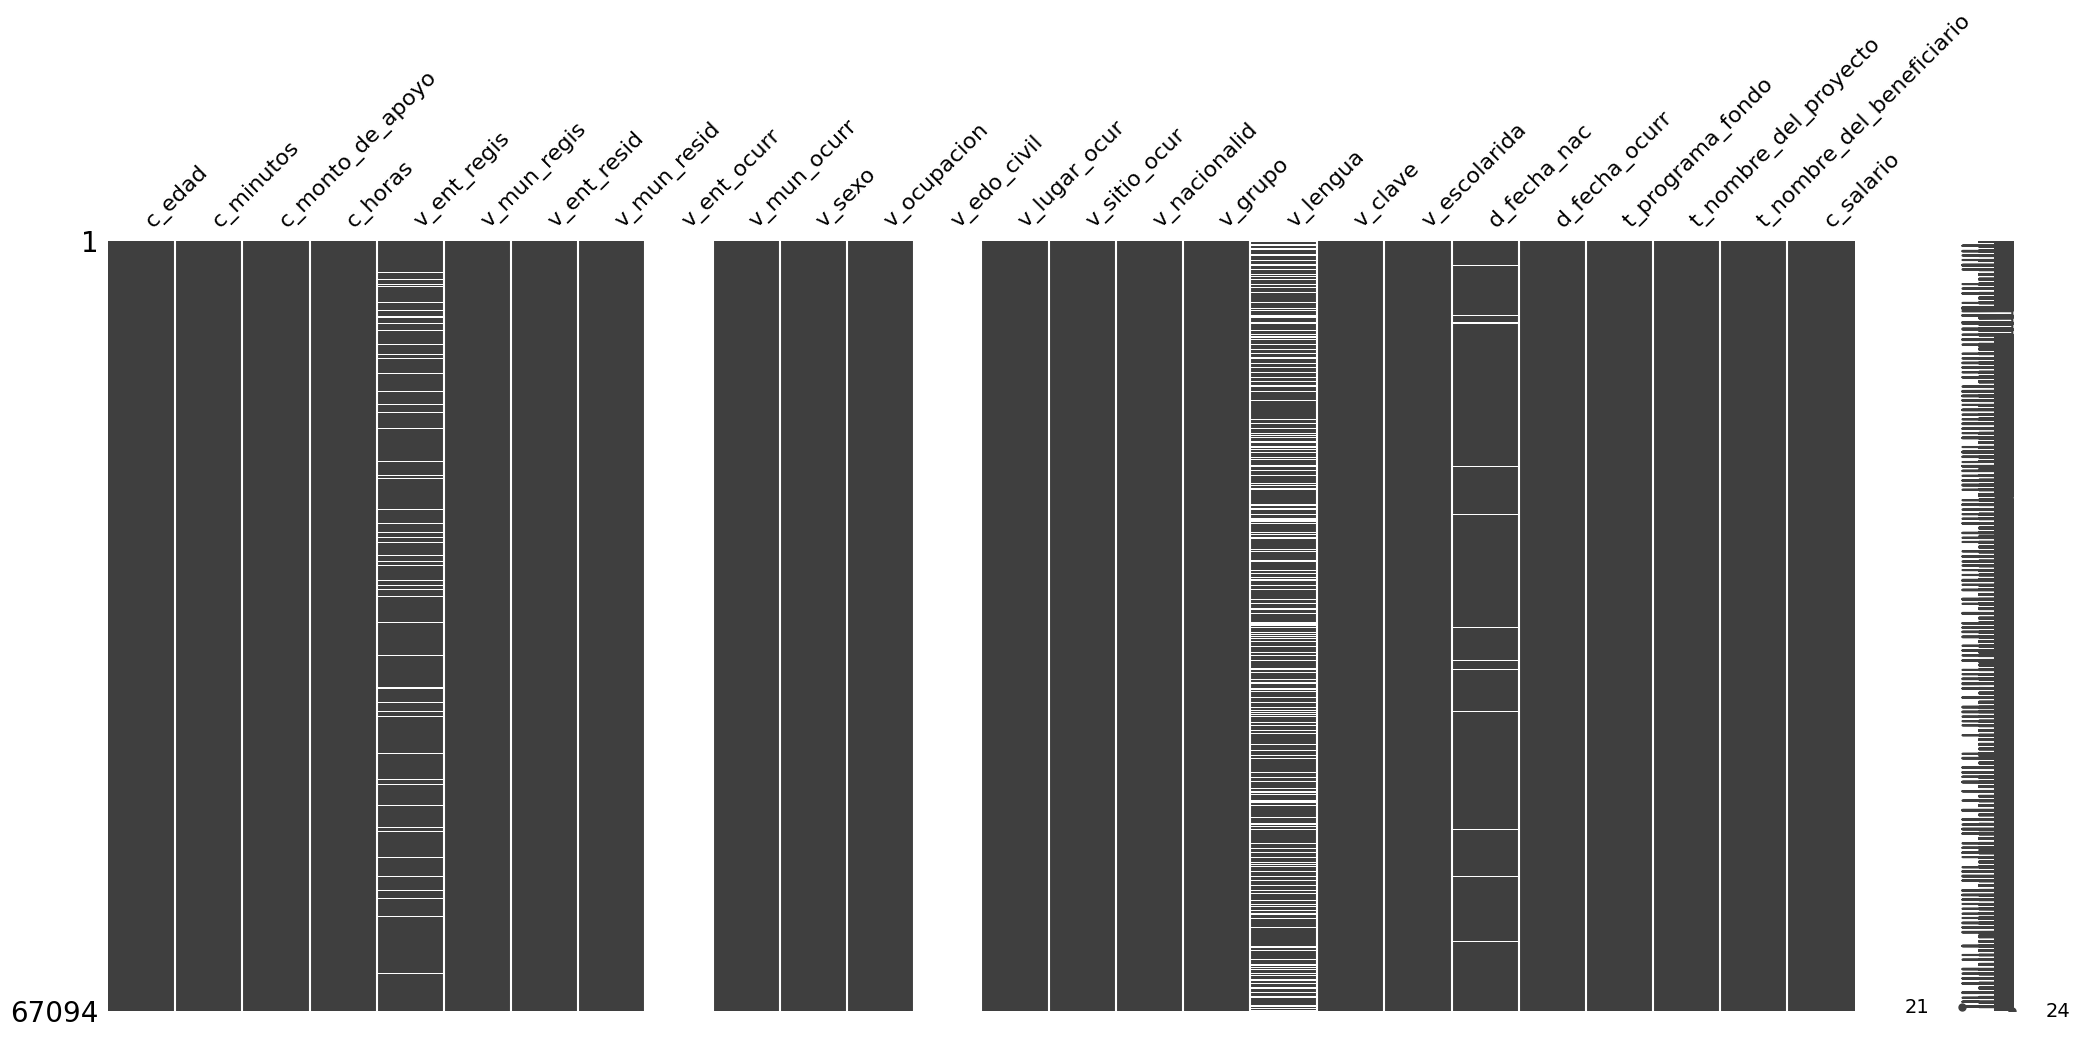

In [123]:
#pip3 install missingno
import missingno as msno
msno.matrix(df.iloc[:, :30])

In [124]:
comple=pd.DataFrame(df.isnull().sum())

In [125]:
comple

,0
c_edad,0
c_minutos,0
c_monto_de_apoyo,0
c_horas,0
v_ent_regis,4709
v_mun_regis,0
v_ent_resid,0
v_mun_resid,0
v_ent_ocurr,67094
v_mun_ocurr,0


In [126]:
comple.reset_index(inplace=True)

comple=comple.rename(columns={"index":"columna",0:"total"})

comple["completitud"]=(1-comple["total"]/df.shape[0])*100

comple=comple.sort_values(by="completitud",ascending=True)

comple.reset_index(drop=True,inplace=True)

In [127]:
comple

,columna,total,completitud
0,v_edo_civil,67094,0.000000
1,v_ent_ocurr,67094,0.000000
2,v_lengua,17979,73.203267
3,v_ent_regis,4709,92.981489
4,d_fecha_nac,1203,98.206993
5,t_nombre_del_proyecto,0,100.000000
6,t_programa_fondo,0,100.000000
7,d_fecha_ocurr,0,100.000000
8,v_escolarida,0,100.000000
9,v_clave,0,100.000000


In [128]:
def completitud(df):
    comple=pd.DataFrame(df.isnull().sum())
    comple.reset_index(inplace=True)
    comple=comple.rename(columns={"index":"columna",0:"total"})
    comple["completitud"]=(1-comple["total"]/df.shape[0])*100
    comple=comple.sort_values(by="completitud",ascending=True)
    comple.reset_index(drop=True,inplace=True)
    return comple

In [129]:
df["v_lengua"].value_counts(1)

2.0    0.762883
9.0    0.168849
1.0    0.068268
Name: v_lengua, dtype: float64

In [130]:
#Las variables deben tener arriba de un 80% de completitud para ser admitibles a imputación
comple

,columna,total,completitud
0,v_edo_civil,67094,0.000000
1,v_ent_ocurr,67094,0.000000
2,v_lengua,17979,73.203267
3,v_ent_regis,4709,92.981489
4,d_fecha_nac,1203,98.206993
5,t_nombre_del_proyecto,0,100.000000
6,t_programa_fondo,0,100.000000
7,d_fecha_ocurr,0,100.000000
8,v_escolarida,0,100.000000
9,v_clave,0,100.000000


In [131]:
df.drop(columns=["v_lengua","v_ent_ocurr","v_ent_ocurr"],inplace=True)

In [132]:
df.shape

(67094, 24)

##   <span style="background:#fe7f00"> Presición/Orden </span> 

###   <span style="background:#759566"> Variables Unitarias </span> 

- Las variables que concentran la mayoria de registros en una sola categoria se denominan variables unitarias y son variables que usualemnte no aportan valor

**Repetitivo y poco informativo**
- REPETITIVO : Una columna puede tener muchas observaciones con el mismo valor. Cuando un porcentaje extremadamente alto de la columna tiene un valor repetitivo, debemos investigar si dicha columna proporciona información valiosa. (Variables UNITARIAS)
- IRRELEVANTE : Una vez más, los datos deben proporcionar información valiosa para el proyecto. Si las características no están relacionadas con la pregunta que estamos tratando de resolver, son irrelevantes. Por ejemplo, una función que registre la temperatura en los EE. UU. no proporcionaría información directa sobre los precios de la vivienda en Rusia.

In [133]:
def unitarias(df,col):
    result=pd.DataFrame(df[col].value_counts(1))
    if result.shape[0]>0:
        if (result[col].values[0]>.91) :
            print(f"{col} -- VARIABLE UNITARIA")

In [134]:
for col in df.filter(like="v_").columns:
    unitarias(df,col)

v_nacionalid -- VARIABLE UNITARIA


In [135]:
df.drop(columns=["v_nacionalidad"],inplace=True)

KeyError: "['v_nacionalidad'] not found in axis"

###  <span style="background:#759566"> Variable Categorica - "SEXO" </span> 

In [ ]:
sexo

In [ ]:
def categoricas(df,col):
    result=pd.DataFrame(df[col].value_counts(1))
    if result.shape[0]>0:
        if (result[col].values[0]>.91) :
            print(f"{col} -- VARIABLE UNITARIA")
        result[col]=result[col].map(lambda x:str(round(x*100,2))+"%")
        result.reset_index(inplace=True)
        result.columns=[col+"_valores","%_aparicion"]
    return result

In [ ]:
for col in df.filter(like="v_").columns:
    display(categoricas(df,col))
    print("\n")

In [ ]:
sexo

In [ ]:
df["v_sexo"].value_counts()

In [ ]:
df["v_sexo"].value_counts(1)

In [ ]:
df["v_sexo"].value_counts(1)[-4:].sum()

In [ ]:
"eee3".isdigit()

In [136]:
df[df["v_sexo"].map(lambda x:str(x).isdigit())]["v_sexo"].value_counts()

1    28152
2    22927
1     9092
2     6884
9       23
9       12
Name: v_sexo, dtype: int64

In [137]:
df[~df["v_sexo"].map(lambda x:str(x).isdigit())]["v_sexo"].value_counts()

Sistema Tecnológico de Jalisco, A.C.    1
SFERP S.C.                              1
Molina Pasquel Y Henriquez              1
MARICELA  LOPEZ CEPEDA\n                1
Name: v_sexo, dtype: int64

In [138]:
df[df["v_sexo"].map(lambda x:str(x).isdigit())]["v_sexo"].value_counts().index

Index([1, 2, '1', '2', 9, '9'], dtype='object')

In [139]:
df.shape

(67094, 24)

**Dos opciones:**
- Convertirlos a Nan
- Eliminarlos de la tabla

df=df[df["v_sexo"].map(lambda x:str(x).isdigit())]
df.reset_index(drop=True,inplace=True)

In [140]:
df["v_sexo"].map(lambda x:int(x) if str(x).isdigit() else np.nan).value_counts()

1.0    37244
2.0    29811
9.0       35
Name: v_sexo, dtype: int64

In [141]:
df["v_sexo"]=df["v_sexo"].map(lambda x:int(x) if str(x).isdigit() else np.nan)

In [142]:
completitud(df)

,columna,total,completitud
0,v_edo_civil,67094,0.000000
1,v_ent_regis,4709,92.981489
2,d_fecha_nac,1203,98.206993
3,v_sexo,4,99.994038
4,t_nombre_del_proyecto,0,100.000000
5,t_programa_fondo,0,100.000000
6,d_fecha_ocurr,0,100.000000
7,v_escolarida,0,100.000000
8,v_clave,0,100.000000
9,v_grupo,0,100.000000


In [143]:
df["v_sexo"].dtype

dtype('float64')

In [144]:
df["v_sexo"].value_counts(1)

1.0    0.555135
2.0    0.444343
9.0    0.000522
Name: v_sexo, dtype: float64

In [145]:
sexo["CVE"].dtype

dtype('int64')

In [146]:
sexo.head()

,CVE,DESCRIP
0,1,Hombres
1,2,Mujeres
2,9,Sexo no especificado


In [147]:
df=df.merge(sexo,right_on="CVE",left_on="v_sexo",how="left")

In [148]:
df.drop(columns=["v_sexo","CVE"],inplace=True)
df.rename(columns={"DESCRIP":"v_sexo"},inplace=True)

In [149]:
df["v_sexo"].value_counts()

Hombres                 37244
Mujeres                 29811
Sexo no especificado       35
Name: v_sexo, dtype: int64

In [150]:
#modificamos "Sexo no especificado" por np.nan
df["v_sexo"]=df["v_sexo"].replace({"Sexo no especificado":np.nan})

In [151]:
df["v_sexo"].value_counts()

Hombres    37244
Mujeres    29811
Name: v_sexo, dtype: int64

In [152]:
completitud(df)

,columna,total,completitud
0,v_edo_civil,67094,0.000000
1,v_ent_regis,4709,92.981489
2,d_fecha_nac,1203,98.206993
3,v_sexo,39,99.941873
4,t_nombre_del_beneficiario,0,100.000000
5,t_nombre_del_proyecto,0,100.000000
6,t_programa_fondo,0,100.000000
7,d_fecha_ocurr,0,100.000000
8,v_escolarida,0,100.000000
9,v_clave,0,100.000000


###  <span style="background:#759566"> Variable Categorica - "OCUPACION" </span> 

In [153]:
df["v_ocupacion"].dtype

dtype('int64')

In [154]:
df=df.merge(ocupacion,right_on="CVE",left_on="v_ocupacion",how="left")

In [155]:
df.drop(columns=["v_ocupacion","CVE"],inplace=True)
df.rename(columns={"DESCRIP":"v_ocupacion"},inplace=True)

In [156]:
df["v_ocupacion"].value_counts()

No trabaja                                                                                  35531
Trabajadores en actividades agrícolas, ganaderas, forestales, caza y pesca                   7223
Trabajadores artesanales                                                                     3843
Ocupación no especificada                                                                    3616
Comerciantes, empleados en ventas y agentes de ventas                                        3275
No aplica a menores de 5 años                                                                2847
Profesionistas y técnicos                                                                    2840
Ocupaciones insuficientemente especificadas                                                  2770
Trabajadores en actividades elementales y de apoyo                                           2051
Operadores de maquinaria industrial, ensambladores, choferes y conductores de transporte     1465
Trabajadores en serv

In [157]:
df["v_ocupacion"]=df["v_ocupacion"].map(clean_text)

In [158]:
len(df["v_ocupacion"].value_counts(1).index)

14

In [159]:
df["v_ocupacion"].value_counts(1)

no trabaja                                                                                0.529570
trabajadores en actividades agricolas ganaderas forestales caza y pesca                   0.107655
trabajadores artesanales                                                                  0.057278
ocupacion no especificada                                                                 0.053895
comerciantes empleados en ventas y agentes de ventas                                      0.048812
no aplica a menores de 5 anos                                                             0.042433
profesionistas y tecnicos                                                                 0.042329
ocupaciones insuficientemente especificadas                                               0.041285
trabajadores en actividades elementales y de apoyo                                        0.030569
operadores de maquinaria industrial ensambladores choferes y conductores de transporte    0.021835
trabajador

####  <span style="background:#e1d486"> NORMALIZACION CATEGORICAS  </span> 

In [160]:
df["v_ocupacion"].value_counts(1)[-4:].sum()

0.02433898709273556

In [161]:
df["v_ocupacion"].value_counts(1)[-3:].sum()

0.009509047008674398

In [162]:
list(df["v_ocupacion"].value_counts(1)[-3:].index)

['trabajadores auxiliares en actividades administrativas',
 'funcionarios directores y jefes',
 'busca trabajo']

In [163]:
dict(zip(list(df["v_ocupacion"].value_counts(1)[-3:].index),["otro"]*3))

{'trabajadores auxiliares en actividades administrativas': 'otro',
 'funcionarios directores y jefes': 'otro',
 'busca trabajo': 'otro'}

In [164]:
dictio_ocupaciones=dict(zip(list(df["v_ocupacion"].value_counts(1)[-3:].index),["otro"]*3))

In [165]:
df["v_ocupacion"].replace(dictio_ocupaciones).value_counts(1)

no trabaja                                                                                0.529570
trabajadores en actividades agricolas ganaderas forestales caza y pesca                   0.107655
trabajadores artesanales                                                                  0.057278
ocupacion no especificada                                                                 0.053895
comerciantes empleados en ventas y agentes de ventas                                      0.048812
no aplica a menores de 5 anos                                                             0.042433
profesionistas y tecnicos                                                                 0.042329
ocupaciones insuficientemente especificadas                                               0.041285
trabajadores en actividades elementales y de apoyo                                        0.030569
operadores de maquinaria industrial ensambladores choferes y conductores de transporte    0.021835
trabajador

In [166]:
df["v_ocupacion"]=df["v_ocupacion"].replace(dictio_ocupaciones)

###  <span style="background:#759566"> Variable Categorica - "ESCOLARIDAD" </span> 

In [167]:
df["v_escolarida"].value_counts()

3     17260
1     12871
4     12861
6      6355
9      4301
99     3850
8      3441
88     2723
5      1819
7      1258
10      256
2        99
Name: v_escolarida, dtype: int64

In [168]:
df["v_escolarida"].dtype

dtype('int64')

In [169]:
escolaridad["CVE"].dtype

dtype('int64')

In [170]:
df=df.merge(escolaridad,right_on="CVE",left_on="v_escolarida",how="left")

In [171]:
df.drop(columns=["v_escolarida","CVE"],inplace=True)
df.rename(columns={"DESCRIP":"v_escolarida"},inplace=True)

In [172]:
df["v_escolarida"].value_counts(1)

Primaria incompleta                       0.257251
Sin escolaridad                           0.191835
Primaria completa                         0.191686
Secundaria completa                       0.094718
Profesional                               0.064104
No especificado                           0.057382
Bachillerato o Preparatoria completo      0.051286
No aplica a menores de 3 años             0.040585
Secundaria incompleta                     0.027111
Bachillerato o Preparatoria incompleto    0.018750
Posgrado                                  0.003816
Preescolar                                0.001476
Name: v_escolarida, dtype: float64

In [173]:
#Modificamos "No especificado" a np.nan

In [174]:
df["v_escolarida"].replace({"No especificado":np.nan}).value_counts(1)

Primaria incompleta                       0.272911
Sin escolaridad                           0.203513
Primaria completa                         0.203355
Secundaria completa                       0.100484
Profesional                               0.068006
Bachillerato o Preparatoria completo      0.054408
No aplica a menores de 3 años             0.043055
Secundaria incompleta                     0.028762
Bachillerato o Preparatoria incompleto    0.019891
Posgrado                                  0.004048
Preescolar                                0.001565
Name: v_escolarida, dtype: float64

In [175]:
df["v_escolarida"]=df["v_escolarida"].replace({"No especificado":np.nan})

In [176]:
df["v_escolarida"].value_counts(1)

Primaria incompleta                       0.272911
Sin escolaridad                           0.203513
Primaria completa                         0.203355
Secundaria completa                       0.100484
Profesional                               0.068006
Bachillerato o Preparatoria completo      0.054408
No aplica a menores de 3 años             0.043055
Secundaria incompleta                     0.028762
Bachillerato o Preparatoria incompleto    0.019891
Posgrado                                  0.004048
Preescolar                                0.001565
Name: v_escolarida, dtype: float64

In [177]:
dictio_escolaridad={"Posgrado":"Profesional","Primaria incompleta":"Primaria","Primaria completa":"Primaria",
                   "Secundaria incompleta":"Secundaria","Secundaria completa":"Secundaria",
                   "Bachillerato o Preparatoria incompleto":"Bachillerato o Preparatoria","Bachillerato o Preparatoria completo":"Bachillerato o Preparatoria",
                   }

In [178]:
df["v_escolarida"].replace(dictio_escolaridad).value_counts(1)

Primaria                         0.476267
Sin escolaridad                  0.203513
Secundaria                       0.129245
Bachillerato o Preparatoria      0.074300
Profesional                      0.072054
No aplica a menores de 3 años    0.043055
Preescolar                       0.001565
Name: v_escolarida, dtype: float64

In [179]:
df["v_escolarida"]=df["v_escolarida"].replace(dictio_escolaridad)

### <span style="background:#759566"> Continuas </span> 

In [180]:
df.filter(like="c_").describe()

,c_edad,c_minutos,c_horas,c_salario
count,67094.000000,67094.000000,67094.000000,67094.000000
mean,4004.905938,21.688392,12.695636,2136.830417
std,380.211589,19.484495,11.217706,1983.501166
min,1001.000000,0.000000,0.000000,-9900.000000
25%,4051.000000,0.000000,6.000000,0.000000
50%,4069.000000,20.000000,12.000000,2000.000000
75%,4081.000000,35.000000,18.000000,3400.000000
max,4998.000000,99.000000,99.000000,9900.000000


In [181]:
df["c_minutos"]=df["c_minutos"].astype(float)

In [182]:
df["c_horas"]=df["c_horas"].astype(float)

##  <span style="background:#fe7f00"> Consistencia </span> 

### <span style="background:#759566"> Variable Continua - "SALARIO" </span> 

In [183]:
#Verificamos si existe información no consistente
df[df["c_salario"].map(lambda x:x<0)]

,c_edad,c_minutos,c_monto_de_apoyo,c_horas,v_ent_regis,v_mun_regis,v_ent_resid,v_mun_resid,v_mun_ocurr,v_edo_civil,v_lugar_ocur,v_sitio_ocur,v_nacionalid,v_grupo,v_clave,d_fecha_nac,d_fecha_ocurr,t_programa_fondo,t_nombre_del_proyecto,t_nombre_del_beneficiario,c_salario,v_sexo,v_ocupacion,v_escolarida
337,4082,40.0,534650.0,18.0,13.0,28,13,28,28,NaN,88,11,1,5,6836,1933-06-01,2015-10-13,programa para el fomento de recursos humanos d...,becas singularity u mexico summit 4 0 industri...,4 0 industrial cluster a c,-4000,Mujeres,no trabaja,Sin escolaridad
648,4054,50.0,2642237.0,17.0,4.0,3,4,3,2,NaN,88,4,1,2,6837,1960-12-03,2015-06-14,programa cluster de ciencia tecnologia e innov...,participacion de la industria mexicana del clu...,4 0 industrial cluster a c,-5000,Mujeres,no trabaja,Primaria
708,4050,30.0,2642237.0,22.0,9.0,5,9,5,5,NaN,88,11,1,4,6837,1964-03-12,2015-08-18,programa cluster de ciencia tecnologia e innov...,participacion de la industria mexicana del clu...,4 0 industrial cluster a c,-3000,Hombres,no trabaja,Secundaria
875,4053,50.0,3258370.0,19.0,9.0,15,15,58,15,NaN,88,1,1,3,6821,1961-07-02,2014-06-06,programa estatal para el desarrollo de la indu...,fortalecimiento de capacidades empresariales p...,4 0 industrial cluster ac,-5000,Mujeres,no trabaja,Primaria
1515,4031,50.0,58700.35,10.0,30.0,193,30,105,193,NaN,88,3,1,3,6553,1984-02-02,2015-08-04,programa jalisciense de fomento a la propiedad...,compresor recirculador de fluidos,active financial s a de c v,-5000,Hombres,profesionistas y tecnicos,Profesional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66396,4029,50.0,472500.0,23.0,10.0,5,10,1,5,NaN,4,1,1,9,6353,1986-03-27,2015-02-18,programa de difusion y divulgacion de la cienc...,participacion de comunidad estudiantil y docen...,universidad tecnologica de jalisco,-5000,Hombres,comerciantes empleados en ventas y agentes de ...,Bachillerato o Preparatoria
66502,4052,55.0,472500.0,3.0,30.0,132,30,132,132,NaN,88,11,1,8,6353,1963-07-22,2015-06-12,programa de difusion y divulgacion de la cienc...,participacion de comunidad estudiantil y docen...,universidad tecnologica de jalisco,-5500,Hombres,trabajadores en actividades agricolas ganadera...,Primaria
66505,4090,30.0,472500.0,7.0,14.0,39,14,101,39,NaN,88,3,1,5,6353,1924-09-09,2015-06-15,programa de difusion y divulgacion de la cienc...,participacion de comunidad estudiantil y docen...,universidad tecnologica de jalisco,-3000,Hombres,no trabaja,Primaria
66538,4061,15.0,472500.0,1.0,9.0,7,9,7,7,NaN,88,8,1,6,6353,1954-01-30,2015-07-20,programa de difusion y divulgacion de la cienc...,participacion de comunidad estudiantil y docen...,universidad tecnologica de jalisco,-1500,Hombres,trabajadores artesanales,Primaria


In [184]:
df[df["c_salario"].map(lambda x:x<0)].shape[0]/df.shape[0]

0.005276179688198646

In [185]:
df=df[~df["c_salario"].map(lambda x:x<0)]

In [186]:
df.reset_index(drop=True,inplace=True)

In [187]:
df["c_salario"]=df["c_salario"].astype(float)

In [188]:
df["c_salario"].describe()

count    66740.000000
mean      2164.253821
std       1948.994535
min          0.000000
25%          0.000000
50%       2000.000000
75%       3400.000000
max       9900.000000
Name: c_salario, dtype: float64

### <span style="background:#759566"> Variable Continua - "EDAD" </span> 

In [189]:
df["c_edad"]

0        4055
1        4085
2        4061
3        4078
4        4046
         ... 
66735    4080
66736    4085
66737    4089
66738    4085
66739    4061
Name: c_edad, Length: 66740, dtype: int64

In [190]:
edad

,CVE,DESCRIP
0,1001,Una hora
1,1002,Dos horas
2,1003,Tres horas
3,1004,Cuatro horas
4,1005,Cinco horas
...,...,...
183,4117,Ciento diecisiete años
184,4118,Ciento dieciocho años
185,4119,Ciento diecinueve años
186,4120,Ciento veinte años


In [191]:
edad[edad["CVE"].map(lambda x:str(x).startswith("4"))]

,CVE,DESCRIP
67,4001,Un año
68,4002,Dos años
69,4003,Tres años
70,4004,Cuatro años
71,4005,Cinco años
...,...,...
183,4117,Ciento diecisiete años
184,4118,Ciento dieciocho años
185,4119,Ciento diecinueve años
186,4120,Ciento veinte años


In [192]:
df[~df["c_edad"].map(lambda x:str(x).startswith("4"))]

,c_edad,c_minutos,c_monto_de_apoyo,c_horas,v_ent_regis,v_mun_regis,v_ent_resid,v_mun_resid,v_mun_ocurr,v_edo_civil,v_lugar_ocur,v_sitio_ocur,v_nacionalid,v_grupo,v_clave,d_fecha_nac,d_fecha_ocurr,t_programa_fondo,t_nombre_del_proyecto,t_nombre_del_beneficiario,c_salario,v_sexo,v_ocupacion,v_escolarida
58,3002,20.0,534650.0,0.0,NaN,12,12,12,12,NaN,88,11,1,4,6836,2014-08-27,2014-10-02,programa para el fomento de recursos humanos d...,becas singularity u mexico summit 4 0 industri...,4 0 industrial cluster a c,2000.0,Hombres,no aplica a menores de 5 anos,No aplica a menores de 3 años
77,1097,24.0,534650.0,18.0,14.0,39,14,39,39,NaN,88,8,1,8,6836,2015-07-23,2015-01-05,programa para el fomento de recursos humanos d...,becas singularity u mexico summit 4 0 industri...,4 0 industrial cluster a c,2400.0,Hombres,no aplica a menores de 5 anos,No aplica a menores de 3 años
106,3003,0.0,534650.0,4.0,17.0,9,17,9,9,NaN,88,11,1,13,6836,2015-05-03,2015-02-06,programa para el fomento de recursos humanos d...,becas singularity u mexico summit 4 0 industri...,4 0 industrial cluster a c,0.0,Hombres,no aplica a menores de 5 anos,No aplica a menores de 3 años
125,3002,0.0,534650.0,3.0,20.0,232,20,232,232,NaN,88,11,1,2,6836,2015-09-27,2015-02-25,programa para el fomento de recursos humanos d...,becas singularity u mexico summit 4 0 industri...,4 0 industrial cluster a c,0.0,Mujeres,no aplica a menores de 5 anos,No aplica a menores de 3 años
140,2004,35.0,534650.0,21.0,NaN,30,5,27,30,NaN,88,1,1,4,6836,2015-08-25,2015-03-12,programa para el fomento de recursos humanos d...,becas singularity u mexico summit 4 0 industri...,4 0 industrial cluster a c,3500.0,Hombres,no aplica a menores de 5 anos,No aplica a menores de 3 años
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66590,1097,42.0,2188623.0,23.0,3.0,3,3,3,3,NaN,88,1,1,4,6765,2015-01-09,2015-07-19,programa estatal para el desarrollo de la indu...,creacion de un centro de desarrollo de aplicac...,unosquare s a de c v,4200.0,Mujeres,no aplica a menores de 5 anos,No aplica a menores de 3 años
66633,2027,0.0,2188623.0,9.0,7.0,46,7,46,46,NaN,88,11,1,13,6765,2015-10-14,2015-09-06,programa estatal para el desarrollo de la indu...,creacion de un centro de desarrollo de aplicac...,unosquare s a de c v,0.0,Hombres,no aplica a menores de 5 anos,No aplica a menores de 3 años
66647,1002,40.0,2188623.0,13.0,26.0,17,26,17,17,NaN,88,1,1,4,6765,2015-09-15,2015-09-20,programa estatal para el desarrollo de la indu...,creacion de un centro de desarrollo de aplicac...,unosquare s a de c v,4000.0,Mujeres,no aplica a menores de 5 anos,No aplica a menores de 3 años
66649,3004,50.0,2188623.0,23.0,28.0,38,30,123,38,NaN,88,1,1,5,6765,2014-07-09,2015-09-22,programa estatal para el desarrollo de la indu...,creacion de un centro de desarrollo de aplicac...,unosquare s a de c v,5000.0,Mujeres,no aplica a menores de 5 anos,No aplica a menores de 3 años


In [193]:
df[~df["c_edad"].map(lambda x:str(x).startswith("4"))].shape[0]/df.shape[0]

0.035016481869943064

In [194]:
df=df[df["c_edad"].map(lambda x:str(x).startswith("4"))]
df.reset_index(drop=True,inplace=True)

In [195]:
df["c_edad"]=df["c_edad"].astype(str).str[-3:].astype(int)

In [196]:
df["c_edad"].value_counts()

84     1565
79     1512
78     1450
80     1410
85     1410
       ... 
112       3
114       3
115       1
117       1
113       1
Name: c_edad, Length: 117, dtype: int64

In [197]:
df.head()

,c_edad,c_minutos,c_monto_de_apoyo,c_horas,v_ent_regis,v_mun_regis,v_ent_resid,v_mun_resid,v_mun_ocurr,v_edo_civil,v_lugar_ocur,v_sitio_ocur,v_nacionalid,v_grupo,v_clave,d_fecha_nac,d_fecha_ocurr,t_programa_fondo,t_nombre_del_proyecto,t_nombre_del_beneficiario,c_salario,v_sexo,v_ocupacion,v_escolarida
0,55,30.0,534650.0,10.0,25.0,12,2,2,12,NaN,8,12,1,16,6836,1952-12-28,2008-07-22,programa para el fomento de recursos humanos d...,becas singularity u mexico summit 4 0 industri...,4 0 industrial cluster a c,3000.0,Hombres,ocupaciones insuficientemente especificadas,Primaria
1,85,30.0,534650.0,14.0,25.0,12,25,12,12,NaN,88,3,1,3,6836,1925-05-28,2010-07-28,programa para el fomento de recursos humanos d...,becas singularity u mexico summit 4 0 industri...,4 0 industrial cluster a c,3000.0,Hombres,ocupacion no especificada,Primaria
2,61,30.0,534650.0,14.0,5.0,30,5,30,30,NaN,88,3,1,8,6836,1950-04-30,2011-04-11,programa para el fomento de recursos humanos d...,becas singularity u mexico summit 4 0 industri...,4 0 industrial cluster a c,3000.0,Mujeres,no trabaja,Secundaria
3,78,45.0,534650.0,14.0,NaN,11,25,11,11,NaN,88,1,1,7,6836,1932-11-20,2011-06-11,programa para el fomento de recursos humanos d...,becas singularity u mexico summit 4 0 industri...,4 0 industrial cluster a c,4500.0,Mujeres,no trabaja,Sin escolaridad
4,46,45.0,534650.0,17.0,30.0,121,30,13,121,NaN,4,10,1,17,6836,1966-02-15,2012-11-03,programa para el fomento de recursos humanos d...,becas singularity u mexico summit 4 0 industri...,4 0 industrial cluster a c,4500.0,Mujeres,ocupaciones insuficientemente especificadas,Secundaria


In [198]:
edad

,CVE,DESCRIP
0,1001,Una hora
1,1002,Dos horas
2,1003,Tres horas
3,1004,Cuatro horas
4,1005,Cinco horas
...,...,...
183,4117,Ciento diecisiete años
184,4118,Ciento dieciocho años
185,4119,Ciento diecinueve años
186,4120,Ciento veinte años


In [199]:
df[df["c_edad"]==129]

,c_edad,c_minutos,c_monto_de_apoyo,c_horas,v_ent_regis,v_mun_regis,v_ent_resid,v_mun_resid,v_mun_ocurr,v_edo_civil,v_lugar_ocur,v_sitio_ocur,v_nacionalid,v_grupo,v_clave,d_fecha_nac,d_fecha_ocurr,t_programa_fondo,t_nombre_del_proyecto,t_nombre_del_beneficiario,c_salario,v_sexo,v_ocupacion,v_escolarida


In [200]:
df["c_edad"].sort_values(ascending=False).value_counts()

84     1565
79     1512
78     1450
80     1410
85     1410
       ... 
112       3
114       3
113       1
115       1
117       1
Name: c_edad, Length: 117, dtype: int64

In [201]:
edad

,CVE,DESCRIP
0,1001,Una hora
1,1002,Dos horas
2,1003,Tres horas
3,1004,Cuatro horas
4,1005,Cinco horas
...,...,...
183,4117,Ciento diecisiete años
184,4118,Ciento dieciocho años
185,4119,Ciento diecinueve años
186,4120,Ciento veinte años


In [202]:
df["c_edad"].describe(percentiles=[.93,.95,.97,.98,.99])

count    64403.000000
mean        71.293402
std         74.404620
min          1.000000
50%         70.000000
93%         91.000000
95%         93.000000
97%         95.000000
98%         97.000000
99%        101.000000
max        998.000000
Name: c_edad, dtype: float64

DOS OPCIONES , DEJARLAS Y TAL VEZ SE DETECTARAN EN LA SECCION DE OUTLIERS O SI SON POCOS REGISTRON REMPLAZAMOS POR NAN Y LAS ELIMINAMOS

In [203]:
df["c_edad"]=df["c_edad"].map(lambda x:x if x!=998 else np.nan)

In [204]:
df[df["c_edad"]>97].shape[0]/df.shape[0]

0.012980761765756254

In [205]:
df["c_edad"].describe()

count    64022.000000
mean        65.778498
std         20.683343
min          1.000000
25%         54.000000
50%         70.000000
75%         82.000000
max        117.000000
Name: c_edad, dtype: float64

In [206]:
df=df[df["c_edad"]<98]

### <span style="background:#759566"> Variable Continua - "MONTO APOYO" </span> 

In [207]:
df.shape

(63186, 24)

In [208]:
df.filter(like="c_").describe()

,c_edad,c_minutos,c_horas,c_salario
count,63186.000000,63186.000000,63186.000000,63186.000000
mean,65.316067,21.565347,12.651125,2156.534675
std,20.419814,19.373307,10.970479,1937.330742
min,1.000000,0.000000,0.000000,0.000000
25%,53.000000,0.000000,6.000000,0.000000
50%,69.000000,20.000000,12.000000,2000.000000
75%,81.000000,34.000000,18.000000,3400.000000
max,97.000000,99.000000,99.000000,9900.000000


In [209]:
df["c_monto_de_apoyo"].value_counts()

12254.04                                5595
31450.0                                 3243
50336.83                                3229
30884.1                                 2374
12254.04                                2041
                                        ... 
SFERP S.C.                                 1
-1570                                      1
Molina Pasquel Y Henriquez                 1
MARICELA  LOPEZ CEPEDA\n                   1
Sistema Tecnológico de Jalisco, A.C.       1
Name: c_monto_de_apoyo, Length: 175, dtype: int64

In [210]:
df[df["c_monto_de_apoyo"].map(lambda x:any([str(y).isalpha() for y in str(x)]))]

,c_edad,c_minutos,c_monto_de_apoyo,c_horas,v_ent_regis,v_mun_regis,v_ent_resid,v_mun_resid,v_mun_ocurr,v_edo_civil,v_lugar_ocur,v_sitio_ocur,v_nacionalid,v_grupo,v_clave,d_fecha_nac,d_fecha_ocurr,t_programa_fondo,t_nombre_del_proyecto,t_nombre_del_beneficiario,c_salario,v_sexo,v_ocupacion,v_escolarida
18487,40.0,5.0,"Sistema Tecnológico de Jalisco, A.C.",2.0,2.0,4,2,4,4,NaN,9,99,1,27,6747,NaN,2014-06-07,programa para el fomento de recursos humanos d...,solicitud de beca para asistencia al evento si...,eduardo jacobo arroyo,500.0,NaN,ocupaciones insuficientemente especificadas,NaN
25156,18.0,40.0,SFERP S.C.,19.0,1.0,5,1,5,1,NaN,88,3,1,1,6522,1997-09-13,2015-11-02,programa jalisciense de fomento a la propiedad...,chumacera carcasa con toma de fuerza para moto...,francisco xavier valdes simancas,4000.0,NaN,ocupacion no especificada,Sin escolaridad
30737,38.0,15.0,Molina Pasquel Y Henriquez,1.0,7.0,65,7,65,65,NaN,88,11,2,7,6453,1977-03-12,2015-12-22,programa jalisciense de fomento a la propiedad...,pct sistema de ensamble para muebles y estruct...,humberto gonzalez calleja,1500.0,NaN,no trabaja,Primaria
41410,54.0,20.0,MARICELA LOPEZ CEPEDA\n,9.0,1.0,7,1,7,7,NaN,88,11,1,10,6475,1961-08-26,2015-02-15,programa jalisciense de fomento a la propiedad...,mx metodo para la deshidratacion de sustancias...,katia saucedo fernandez,2000.0,NaN,trabajadores artesanales,Primaria


In [211]:
completitud(df)

,columna,total,completitud
0,v_edo_civil,63186,0.000000
1,v_ent_regis,4477,92.914570
2,v_escolarida,3409,94.604818
3,d_fecha_nac,796,98.740227
4,v_sexo,5,99.992087
5,c_salario,0,100.000000
6,t_nombre_del_beneficiario,0,100.000000
7,t_nombre_del_proyecto,0,100.000000
8,t_programa_fondo,0,100.000000
9,d_fecha_ocurr,0,100.000000


In [212]:
df["c_monto_de_apoyo"]=df["c_monto_de_apoyo"].map(lambda x:np.nan if any([str(y).isalpha() for y in str(x)]) else x)

In [213]:
completitud(df)

,columna,total,completitud
0,v_edo_civil,63186,0.000000
1,v_ent_regis,4477,92.914570
2,v_escolarida,3409,94.604818
3,d_fecha_nac,796,98.740227
4,v_sexo,5,99.992087
5,c_monto_de_apoyo,4,99.993669
6,c_salario,0,100.000000
7,t_nombre_del_beneficiario,0,100.000000
8,t_nombre_del_proyecto,0,100.000000
9,t_programa_fondo,0,100.000000


In [214]:
df["c_monto_de_apoyo"].astype(float).describe()

count    6.318200e+04
mean     2.983005e+05
std      6.928528e+05
min     -1.570000e+03
25%      3.088410e+04
50%      5.033683e+04
75%      1.502410e+05
max      5.000000e+06
Name: c_monto_de_apoyo, dtype: float64

In [215]:
df["c_monto_de_apoyo"]=df["c_monto_de_apoyo"].astype(float)

In [216]:
df[df["c_monto_de_apoyo"].map(lambda x:x<0)]

,c_edad,c_minutos,c_monto_de_apoyo,c_horas,v_ent_regis,v_mun_regis,v_ent_resid,v_mun_resid,v_mun_ocurr,v_edo_civil,v_lugar_ocur,v_sitio_ocur,v_nacionalid,v_grupo,v_clave,d_fecha_nac,d_fecha_ocurr,t_programa_fondo,t_nombre_del_proyecto,t_nombre_del_beneficiario,c_salario,v_sexo,v_ocupacion,v_escolarida
58166,89.0,30.0,-1570.0,15.0,1.0,1,1,1,1,NaN,88,11,1,5,6367,1926-05-04,2015-12-26,programa jalisciense de fomento a la propiedad...,mx sistema diferencial que controla la traccio...,servando soto velasco,3000.0,Hombres,no trabaja,Sin escolaridad


In [217]:
df=df[~df["c_monto_de_apoyo"].map(lambda x:x<0)].reset_index(drop=True)

In [218]:
df[df["c_monto_de_apoyo"].map(lambda x:x<0)]

,c_edad,c_minutos,c_monto_de_apoyo,c_horas,v_ent_regis,v_mun_regis,v_ent_resid,v_mun_resid,v_mun_ocurr,v_edo_civil,v_lugar_ocur,v_sitio_ocur,v_nacionalid,v_grupo,v_clave,d_fecha_nac,d_fecha_ocurr,t_programa_fondo,t_nombre_del_proyecto,t_nombre_del_beneficiario,c_salario,v_sexo,v_ocupacion,v_escolarida


### <span style="background:#759566"> Variable Continua - "HORAS" </span> 

In [219]:
## Consistencia

In [220]:
df["c_horas"].describe(percentiles=np.arange(0.1,1.1,.1))

count    63185.000000
mean        12.651088
std         10.970562
min          0.000000
10%          2.000000
20%          5.000000
30%          7.000000
40%         10.000000
50%         12.000000
60%         14.000000
70%         17.000000
80%         19.000000
90%         21.000000
100%        99.000000
max         99.000000
Name: c_horas, dtype: float64

In [221]:
df[df["c_horas"]>24].shape[0]/df.shape[0]

0.010002373981166416

In [222]:
df.shape

(63185, 24)

In [223]:
df=df[df["c_horas"]<=24]
df.reset_index(drop=True,inplace=True)

### <span style="background:#759566"> Variable Continua - "MINUTOS" </span> 

In [224]:
df["c_minutos"].describe()

count    62553.000000
mean        20.782856
std         17.830516
min          0.000000
25%          0.000000
50%         20.000000
75%         30.000000
max         59.000000
Name: c_minutos, dtype: float64

In [225]:
completitud(df)

,columna,total,completitud
0,v_edo_civil,62553,0.000000
1,v_ent_regis,4375,93.005931
2,v_escolarida,3238,94.823590
3,d_fecha_nac,708,98.868160
4,v_sexo,5,99.992007
5,c_monto_de_apoyo,4,99.993605
6,c_salario,0,100.000000
7,t_nombre_del_beneficiario,0,100.000000
8,t_nombre_del_proyecto,0,100.000000
9,t_programa_fondo,0,100.000000


### <span style="background:#759566"> Variable Continua - "FECHAS" </span> 

In [226]:
df["d_fecha_nac"]=pd.to_datetime(df["d_fecha_nac"])

In [227]:
df["d_fecha_ocurr"]=pd.to_datetime(df["d_fecha_ocurr"])

In [228]:
df.filter(like="d_")

,d_fecha_nac,d_fecha_ocurr
0,1952-12-28,2008-07-22
1,1925-05-28,2010-07-28
2,1950-04-30,2011-04-11
3,1932-11-20,2011-06-11
4,1966-02-15,2012-11-03
...,...,...
62548,1935-02-19,2015-12-24
62549,1929-11-15,2015-12-25
62550,1926-10-02,2015-12-26
62551,1930-06-29,2015-12-27


CONSISTENCIA INTEGRIDAD FECHA

In [229]:
#revisamos si hay casos donde la fecha de nacimiento es mayor a la fecha de ocurrencia
df[df["d_fecha_nac"]>df["d_fecha_ocurr"]]

,c_edad,c_minutos,c_monto_de_apoyo,c_horas,v_ent_regis,v_mun_regis,v_ent_resid,v_mun_resid,v_mun_ocurr,v_edo_civil,v_lugar_ocur,v_sitio_ocur,v_nacionalid,v_grupo,v_clave,d_fecha_nac,d_fecha_ocurr,t_programa_fondo,t_nombre_del_proyecto,t_nombre_del_beneficiario,c_salario,v_sexo,v_ocupacion,v_escolarida


In [230]:
df[df["d_fecha_nac"]>df["d_fecha_ocurr"]].shape[0]/df.shape[0]

0.0

##  <span style="background:#fe7f00"> ANALISIS </span> 

In [231]:
df.head()

,c_edad,c_minutos,c_monto_de_apoyo,c_horas,v_ent_regis,v_mun_regis,v_ent_resid,v_mun_resid,v_mun_ocurr,v_edo_civil,v_lugar_ocur,v_sitio_ocur,v_nacionalid,v_grupo,v_clave,d_fecha_nac,d_fecha_ocurr,t_programa_fondo,t_nombre_del_proyecto,t_nombre_del_beneficiario,c_salario,v_sexo,v_ocupacion,v_escolarida
0,55.0,30.0,534650.0,10.0,25.0,12,2,2,12,NaN,8,12,1,16,6836,1952-12-28,2008-07-22,programa para el fomento de recursos humanos d...,becas singularity u mexico summit 4 0 industri...,4 0 industrial cluster a c,3000.0,Hombres,ocupaciones insuficientemente especificadas,Primaria
1,85.0,30.0,534650.0,14.0,25.0,12,25,12,12,NaN,88,3,1,3,6836,1925-05-28,2010-07-28,programa para el fomento de recursos humanos d...,becas singularity u mexico summit 4 0 industri...,4 0 industrial cluster a c,3000.0,Hombres,ocupacion no especificada,Primaria
2,61.0,30.0,534650.0,14.0,5.0,30,5,30,30,NaN,88,3,1,8,6836,1950-04-30,2011-04-11,programa para el fomento de recursos humanos d...,becas singularity u mexico summit 4 0 industri...,4 0 industrial cluster a c,3000.0,Mujeres,no trabaja,Secundaria
3,78.0,45.0,534650.0,14.0,NaN,11,25,11,11,NaN,88,1,1,7,6836,1932-11-20,2011-06-11,programa para el fomento de recursos humanos d...,becas singularity u mexico summit 4 0 industri...,4 0 industrial cluster a c,4500.0,Mujeres,no trabaja,Sin escolaridad
4,46.0,45.0,534650.0,17.0,30.0,121,30,13,121,NaN,4,10,1,17,6836,1966-02-15,2012-11-03,programa para el fomento de recursos humanos d...,becas singularity u mexico summit 4 0 industri...,4 0 industrial cluster a c,4500.0,Mujeres,ocupaciones insuficientemente especificadas,Secundaria


In [232]:
df[["v_ocupacion", "c_edad"]].groupby(["v_ocupacion"]).agg(["mean", "count"])

c_edad       
                                                         mean  count
v_ocupacion                                                         
comerciantes empleados en ventas y agentes de v...  61.765777   3185
no aplica a menores de 5 anos                        1.846626    489
no trabaja                                          70.012690  34595
ocupacion no especificada                           60.592140   3028
ocupaciones insuficientemente especificadas         48.688476   2690
operadores de maquinaria industrial ensamblador...  53.739554   1436
otro                                                56.588517    627
profesionistas y tecnicos                           59.171768   2777
trabajadores artesanales                            58.744811   3758
trabajadores en actividades agricolas ganaderas...  69.982619   7019
trabajadores en actividades elementales y de apoyo  60.239678   1986
trabajadores en servicios personales y vigilancia   55.681205    963

In [233]:
df[["c_edad", "v_escolarida", "v_sexo"]].groupby(["v_escolarida", "v_sexo"]).agg(["mean", "min", "max", "count"])

c_edad                   
                                            mean   min   max  count
v_escolarida                  v_sexo                               
Bachillerato o Preparatoria   Hombres  50.308430  15.0  97.0   2918
                              Mujeres  56.642644  15.0  97.0   1679
No aplica a menores de 3 años Hombres   1.319048   1.0   2.0    210
                              Mujeres   1.301282   1.0   2.0    156
Preescolar                    Hombres  27.519231   3.0  97.0     52
                              Mujeres  23.717391   3.0  92.0     46
Primaria                      Hombres  67.164677   6.0  97.0  15831
                              Mujeres  71.380316   6.0  97.0  13615
Profesional                   Hombres  61.778300  18.0  97.0   2977
                              Mujeres  62.407432  18.0  97.0   1480
Secundaria                    Hombres  49.048337  12.0  96.0   5172
                              Mujeres  57.324402  12.0  97.0   2799
Sin escolaridad               Hombres  73.029498   3.0  97.0   5458
                              Mujeres  76.047550   3.0  97.0   6919

In [234]:
df.shape

(62553, 24)

In [235]:
n_rows=62553

##  <span style="background:#fe7f00"> RESUMEN </span> 

**1.-Etiquetado de variables de acuerdo a su naturaleza**

**2.-Revision de Duplicados**

***2.1- De forma global, sin considerar la unidad muestral***

***2.2- Identificando la unidad muestral y re-evaluando (2 opciones para mantener la mejor calidad)***

**** 2.2.1- Limpieza de texto ****

**** 2.2.2- Revisar si tenemos nombred duplicados ****

**** 2.2.3- Limpieza de fecha ****

**3.-Completitud**

***3.1- Identificar y eliminar variables con arriba del 80% de nulos***

**4.-Presicion/Orden**

***4.1- Identificar y eliminar variables unitarias***

***4.2- Revision variable por variable los posibles valores y limpieza/eliminacion de "errores"***

**** 4.2.1- Normalizacion de variables categoricas (opcion "OTROS")****

**5.-Consistencia**

***5.1- Revisar variables fuera de rango, irregularidades, erores***
